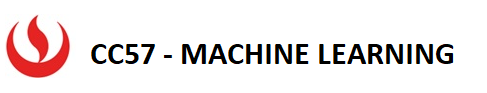

## **ACTIVIDAD #3:** ZOMATO - PLATAFORMA DE RESTAURANTES - CALIDAD DE LOS DATOS

###**1. DESCRIPCION**

**ZOMATO** es conjunto de datos contiene información sobre varios restaurantes que figuran en la plataforma, incluida su ubicación, tipo de cocina, calificaciones, reseñas de usuarios y otros atributos esenciales.
Los datos están diseñados para ayudar a investigadores, entusiastas de los datos y analistas a obtener información sobre la industria de los restaurantes, las preferencias de los clientes y las tendencias culinarias regionales.

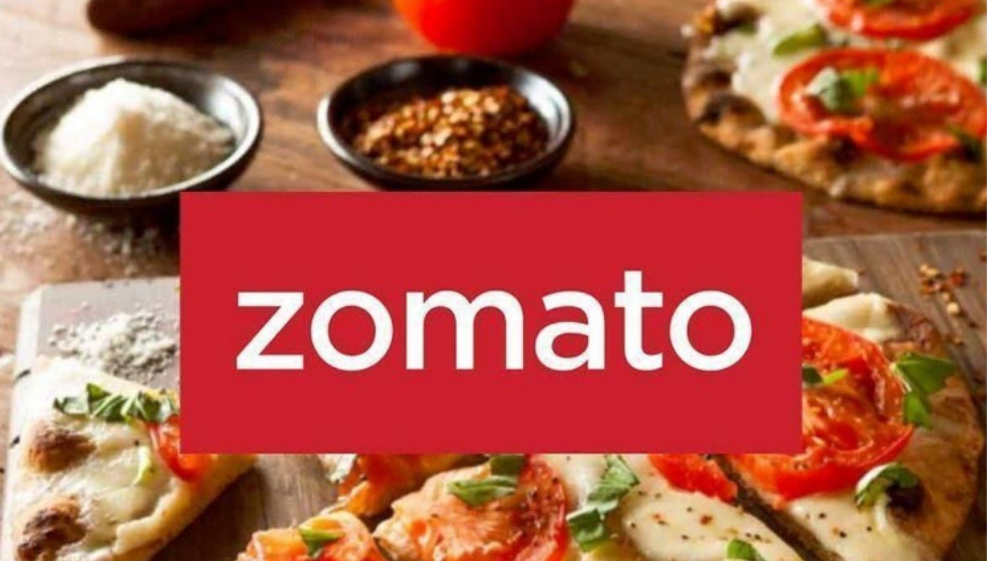

### **2. OBJETIVO**

Realizar:
- Un análisis EDA a partir de los datos proporcionados
- Calcular/visualizar sus principales estadísticas
- Reducir la dimensionalidad del conjunto de datos a 6 componentes (imprima las caracteristicas consideradas en cada uno de los componentes).

####**3. ANALISIS EXPLORATORIO DE LOS DATOS**

El archivo **zomato.csv** es un archivo de valores separados por comas (CSV) que contiene el conjunto de datos del restaurante Zomato. Está diseñado para facilitar el almacenamiento, el intercambio y el análisis de la información relacionada con los restaurantes recopilada desde la plataforma Zomato.

**Conjunto de datos**

El dataset contiene 9551 observaciones en 21 variables.

**Estructura**

- **Restaurant Id :** Unique id of every restaurant across various cities of the world
- **Restaurant Name :** Name of the restaurant
- **Country Code :** Country in which restaurant is located
- **City: **City in which restaurant is located
- **Address:** Address of the restaurant
- **Locality:** Location in the city
- **Locality Verbose:** Detailed description of the locality
- **Longitude:** Longitude coordinate of the restaurant’s location
- **Latitude:** Latitude coordinate of the restaurant’s location
- **Cuisines:** Cuisines offered by the restaurant
- **Average Cost for two:** Cost for two people in different currencies (local currency)
- **Currency:** Currency of the country
- **Has Table booking:** yes/no
- **Has Online delivery:** yes/ no
- **Is delivering:** yes/ no
- **Switch to order menu:** yes/no
- **Price range:** range of price of food
- **Aggregate Rating:** Average rating out of 5
- **Rating color:** depending upon the average rating color
- **Rating text:** text on the basis of rating of rating
- **Votes:** Number of ratings given

**Consideraciones:**

- **Switch to order menu** es NO para todas las observaciones, por lo tanto no tiene valor.
- **Price range ranges** va de uno a cuatro, siendo cuatro restaurantes de precio premium.

Adicionamente se tiene el archivo de paises **Country-Code.csv** a fin de obtener el nombre del pais donde se ubica el resturant.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####**3.1. Librerias**

In [ ]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

####**3.2. Carga de datos**

In [ ]:
# Cargar datos de zomato.csv

data = pd.read_csv('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/Semana 3/Miercoles/Actividad #2: Calidad de los datos - Exploracion y Transformacion/zomato.csv', encoding='latin-1')

####**3.3. Resumen de los datos**


In [ ]:
#Info, head y shape


In [ ]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Head
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
#Shape
data.shape

(9551, 21)

In [ ]:
#Incluir el país en conjunto de datos
country_codes = pd.read_excel('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/Semana 3/Miercoles/Actividad #2: Calidad de los datos - Exploracion y Transformacion/Country-Code.xlsx')


In [ ]:
country_codes.dtypes

Country Code     int64
Country         object
dtype: object

In [ ]:
print(data.columns)
print(country_codes.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Index(['Country Code', 'Country'], dtype='object')


In [ ]:
# Eliminar espacios en los nombres de columnas
data.columns = data.columns.str.strip()
country_codes.columns = country_codes.columns.str.strip()


In [ ]:
# Unir por la columna 'Country Code'
data_completa = pd.merge(data, country_codes, on='Country Code', how='left')


In [ ]:
data_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data_completa.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [ ]:
data_completa.applymap(lambda x: isinstance(x, str))



<ipython-input-2238-f3b7db73215c>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0             False             True         False  True     True      True   
1             False             True         False  True     True      True   
2             False             True         False  True     True      True   
3             False             True         False  True     True      True   
4             False             True         False  True     True      True   
...             ...              ...           ...   ...      ...       ...   
9546          False             True         False  True     True      True   
9547          False             True         False  True     True      True   
9548          False             True         False  True     True      True   
9549          False             True         False  True     True      True   
9550          False             True         False  True     True      True   

      Locality Verbose  Longitude  Latitude  Cuisines  ...  Has Table booking  \
0                 True      False     False      True  ...               True   
1                 True      False     False      True  ...               True   
2                 True      False     False      True  ...               True   
3                 True      False     False      True  ...               True   
4                 True      False     False      True  ...               True   
...                ...        ...       ...       ...  ...                ...   
9546              True      False     False      True  ...               True   
9547              True      False     False      True  ...               True   
9548              True      False     False      True  ...               True   
9549              True      False     False      True  ...               True   
9550              True      False     False      True  ...               True   

      Has Online delivery  Is delivering now  Switch to order menu  \
0                    True               True                  True   
1                    True               True                  True   
2                    True               True                  True   
3                    True               True                  True   
4                    True               True                  True   
...                   ...                ...                   ...   
9546                 True               True                  True   
9547                 True               True                  True   
9548                 True               True                  True   
9549                 True               True                  True   
9550                 True               True                  True   

      Price range  Aggregate rating  Rating color  Rating text  Votes  Country  
0           False             False          True         True  False     True  
1           False             False          True         True  False     True  
2           False             False          True         True  False     True  
3           False             False          True         True  False     True  
4           False             False          True         True  False     True  
...           ...               ...           ...          ...    ...      ...  
9546        False             False          True         True  False     True  
9547        False             False          True         True  False     True  
9548        False             False          True         True  False     True  
9549        False             False          True         True  False     True  
9550        False             False          True         True  False     True  

[9551 rows x 22 columns]

El Average Cost for two, esta definido como un valor economico, pero el valor economico tiene su propia moneda, por lo cual seria mucho mas inteligente darle un valor a su moneda en dolares, crearemos una nueva columna con todos los datos que no Sean de Estados unidos, convertir su moneda en dolar

In [ ]:
exchange_rates = {
    1: 0.012,     # India (INR a USD)
    14: 0.64,     # Australia (AUD a USD)
    30: 0.17,     # Brazil (BRL a USD)
    37: 0.72,     # Canada (CAD a USD)
    94: 0.000059, # Indonesia (IDR a USD)
    148: 0.60,    # New Zealand (NZD a USD)
    162: 0.018,   # Philippines (PHP a USD)
    166: 0.27,    # Qatar (QAR a USD)
    184: 0.76,    # Singapore (SGD a USD)
    189: 0.053,   # South Africa (ZAR a USD)
    191: 0.0033,  # Sri Lanka (LKR a USD)
    208: 0.026,   # Turkey (TRY a USD)
    214: 0.27,    # UAE (AED a USD)
    215: 1.33,     # United Kingdom (GBP to USD)
    216: 1.00,       # United States (USD)
}

In [ ]:
data_completa['Average Cost for two Dollar'] = data_completa.apply(lambda row: row['Average Cost for two'] * exchange_rates.get(row['Country Code'], 1), axis=1)

In [ ]:
# Separar las columnas numéricas
data_numerica = data_completa.select_dtypes(include=['number'])

In [ ]:
# Separar las columnas no numéricas (cadenas de texto, fechas, etc.)
data_no_numerica = data_completa.select_dtypes(exclude=['number'])

In [ ]:
# Mostrar detalles estadísticos básicos (solo los calcula a las variables numericas)
# Mostrar estadísticas básicas
print("=== Estadísticas Básicas ===")
print(data_numerica.describe())

# Mostrar media, mediana y moda para cada columna numérica
print("\n=== Mediana y Moda ===")
for columna in data_numerica.columns:
    print(f"\nColumna: {columna}")
    print(f"  Mediana: {data_numerica[columna].median()}")
    print(f"  Moda: {data_numerica[columna].mode()[0]}")



=== Estadísticas Básicas ===
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  \
count           9551.000000  9551.000000       9551.000000   9551.000000   
mean            1199.210763     1.804837          2.666370    156.909748   
std            16121.183073     0.905609          1.516378    430.169145   
min                0.000000     1.000000          0.000000      0.000000   
25%           

In [ ]:
# Verificar data faltante en cada columna y duplicados
# Datos faltantes:
data_completa.isnull().sum()

Restaurant ID                  0
Restaurant Name                0
Country Code                   0
City                           0
Address                        0
Locality                       0
Locality Verbose               0
Longitude                      0
Latitude                       0
Cuisines                       9
Average Cost for two           0
Currency                       0
Has Table booking              0
Has Online delivery            0
Is delivering now              0
Switch to order menu           0
Price range                    0
Aggregate rating               0
Rating color                   0
Rating text                    0
Votes                          0
Country                        0
Average Cost for two Dollar    0
dtype: int64

In [ ]:
# Verificar si el DataFrame tiene algún valor nulo
print("\n¿Hay valores nulos en el DataFrame?")
print(data_completa.isnull().values.any())


¿Hay valores nulos en el DataFrame?
True


In [ ]:
# Data dupliclados
print(data_completa.duplicated().sum())

0


In [ ]:
#Verificar proporciones de valores nulos
print("Proporciones de valores nulos por columna:")
print(((data_completa.isnull().sum() / len(data_completa)) * 100).round(2))


Proporciones de valores nulos por columna:
Restaurant ID                  0.00
Restaurant Name                0.00
Country Code                   0.00
City                           0.00
Address                        0.00
Locality                       0.00
Locality Verbose               0.00
Longitude                      0.00
Latitude                       0.00
Cuisines                       0.09
Average Cost for two           0.00
Currency                       0.00
Has Table booking              0.00
Has Online delivery            0.00
Is delivering now              0.00
Switch to order menu           0.00
Price range                    0.00
Aggregate rating               0.00
Rating color                   0.00
Rating text                    0.00
Votes                          0.00
Country                        0.00
Average Cost for two Dollar    0.00
dtype: float64


In [ ]:
#Verificar duplicación de registros u observaciones
# Verificar si hay filas duplicadas
duplicados = data_completa.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [ ]:
#Observacion de filas duplicadas
print("Filas duplicadas:")
print(data_completa[data_completa.duplicated()])

Filas duplicadas:
Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country, Average Cost for two Dollar]
Index: []

[0 rows x 23 columns]


###**3.4. Preprocesamiento de los datos**

In [ ]:
#Como solucionamos los datos faltantes? Eliminamos todos los datos faltantes?
#Utilice una tecnica para reemplazar los datos faltantes (una para valores numericos y otra para categoricos)

**Datos no numerico**s, es dependido la situacion cuando se puede reemplazar algo o eliminar, en este caso la columna **cuisines** tiene un valor de **0.09%**, lo que le hace menor a **1%**, es un dato trivial podemos optar por eliminacion o reemplazo, yo optare por pasarle a su moda

In [ ]:
data_completa['Cuisines'] = data_completa['Cuisines'].fillna(data_completa['Cuisines'].mode()[0])

In [ ]:
print(data_completa['Cuisines'].mode()[0])

North Indian


In [ ]:
len(data_completa)

9551

**En datos numericos**, es dependiendo la situacion cuando se debe usar una media o mediana, aunque mayormente se usa la mediana, ya que la media se acerca mas a valores atipicos, en este caso no tenemos no tenemos valores nulos, por lo cual no es necesario utilizar ninguna tecnica.

In [ ]:
#Verificamos que no existan datos faltantes
data_completa.isnull().sum()


Restaurant ID                  0
Restaurant Name                0
Country Code                   0
City                           0
Address                        0
Locality                       0
Locality Verbose               0
Longitude                      0
Latitude                       0
Cuisines                       0
Average Cost for two           0
Currency                       0
Has Table booking              0
Has Online delivery            0
Is delivering now              0
Switch to order menu           0
Price range                    0
Aggregate rating               0
Rating color                   0
Rating text                    0
Votes                          0
Country                        0
Average Cost for two Dollar    0
dtype: int64

In [ ]:
#Solucionar duplicidad en los datos (si existen)
data_completa.duplicated().sum()
# Si existiera algun duplicado, puedo usar esto.
# data_completa = data_completa.drop_duplicates()

np.int64(0)

In [ ]:
#Identificar variables con valores atipicos
data_numerica.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  \
count           9551.000000  9551.000000       9551.000000   9551.000000   
mean            1199.210763     1.804837          2.666370    156.909748   
std            16121.183073     0.905609          1.516378    430.169145   
min                0.000000     1.000000          0.000000      0.000000   
25%              250.000000     1.000000          2.500000      5.000000   
50%              400.000000     2.000000          3.200000     31.000000   
75%              700.000000     2.000000          3.700000    131.000000   
max           800000.000000     4.000000          4.900000  10934.000000   

       Average Cost for two Dollar  
count                  9551.000000  
mean                      9.789842  
std                      14.250069  
min                       0.000000  
25%                       3.600000  
50%                       6.000000  
75%                      10.000000  
max                     380.000000

In [ ]:
data_numerica.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Average Cost for two Dollar'],
      dtype='object')

In [ ]:
len(data_numerica)

9551

<Axes: xlabel='Country Code'>

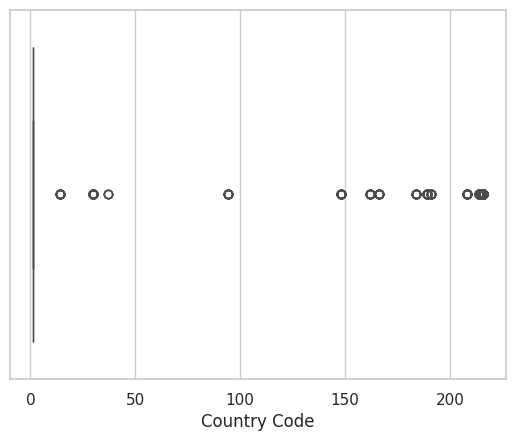

In [ ]:
# Country Code
sns.boxplot(x=data_numerica['Country Code'])

<Axes: xlabel='Longitude'>

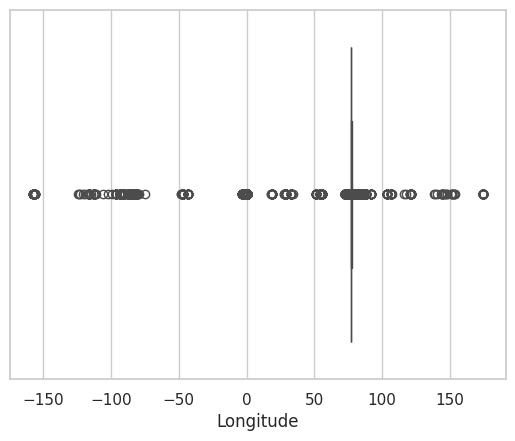

In [ ]:
# Longitude
sns.boxplot(x=data_numerica['Longitude'])

<Axes: xlabel='Latitude'>

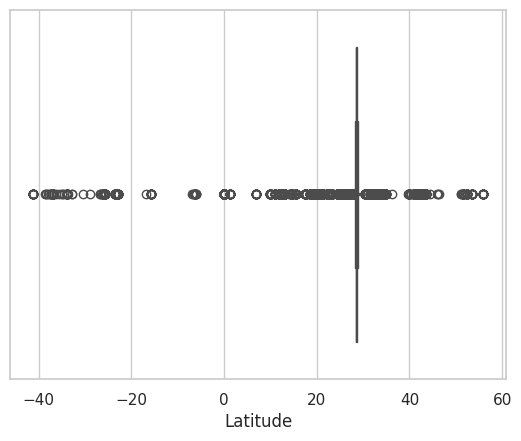

In [ ]:
# Latitude
sns.boxplot(x=data_numerica['Latitude'])

<Axes: xlabel='Average Cost for two'>

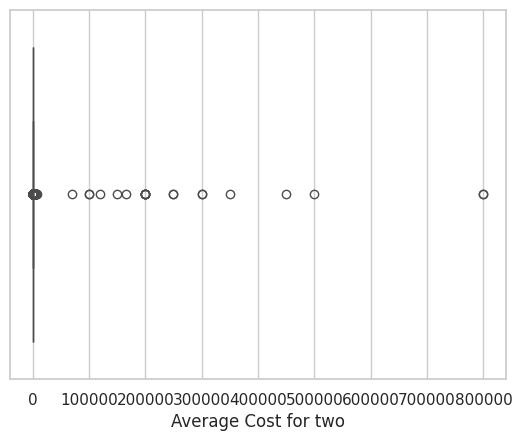

In [ ]:
# Average Cost for two
sns.boxplot(x=data_numerica['Average Cost for two'])

<Axes: xlabel='Price range'>

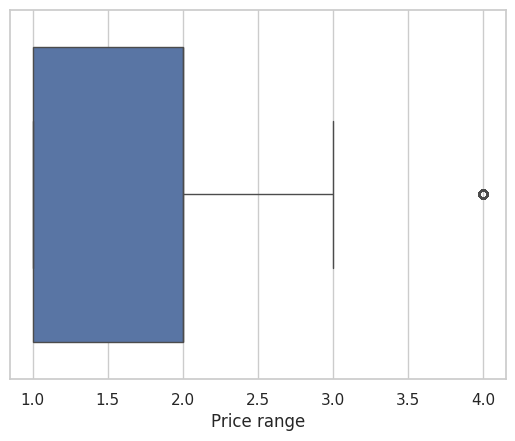

In [ ]:
# Price range
sns.boxplot(x=data_numerica['Price range'])

<Axes: xlabel='Aggregate rating'>

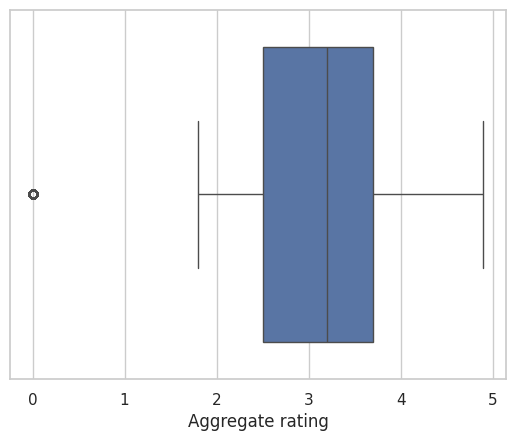

In [ ]:
# Aggregate rating
sns.boxplot(x=data_numerica['Aggregate rating'])

<Axes: xlabel='Votes'>

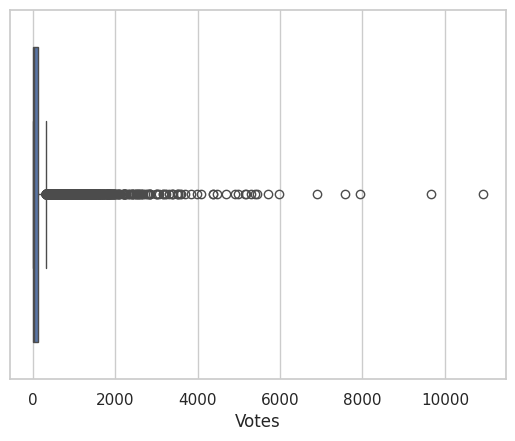

In [ ]:
# Votes
sns.boxplot(x=data_numerica['Votes'])

<Axes: xlabel='Average Cost for two Dollar'>

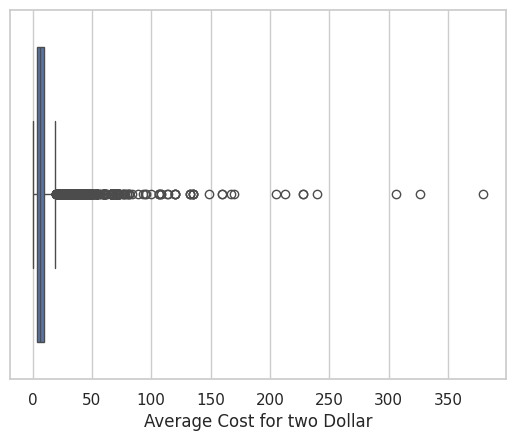

In [ ]:
# Average Cost for two Dollar
sns.boxplot(x=data_numerica['Average Cost for two Dollar'])

<Axes: xlabel='Average Cost for two Dollar'>

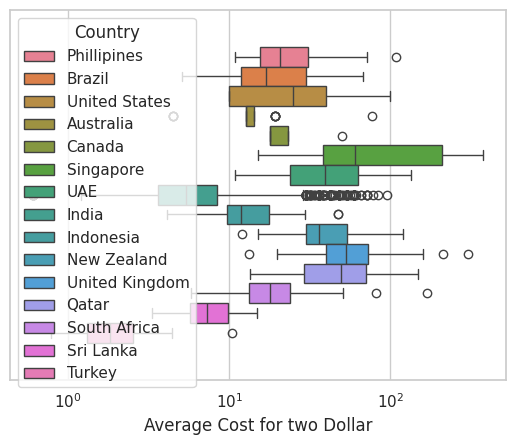

In [ ]:
# Average Cost for two Dollar Por country
sns.boxplot(x=data_completa['Average Cost for two Dollar'],hue='Country', data=data_completa,log_scale=True)

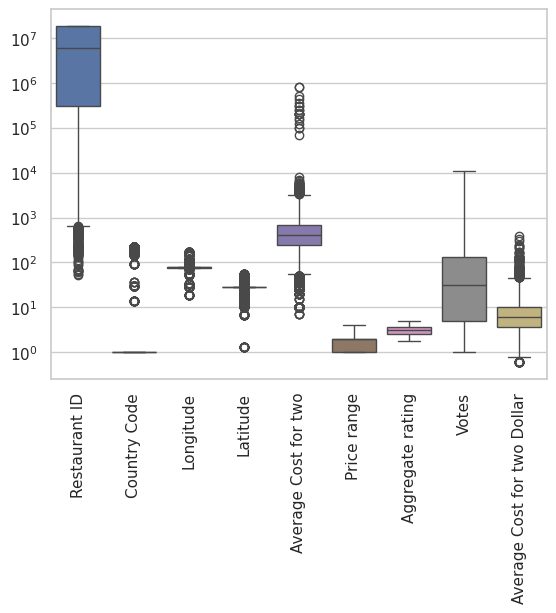

In [ ]:
sns.boxplot(data_numerica,log_scale=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Eliminaremos las variables que no necesitamos
data_numerica_sinId = pd.DataFrame(data_numerica.drop(["Restaurant ID", "Average Cost for two","Votes",], axis=1))


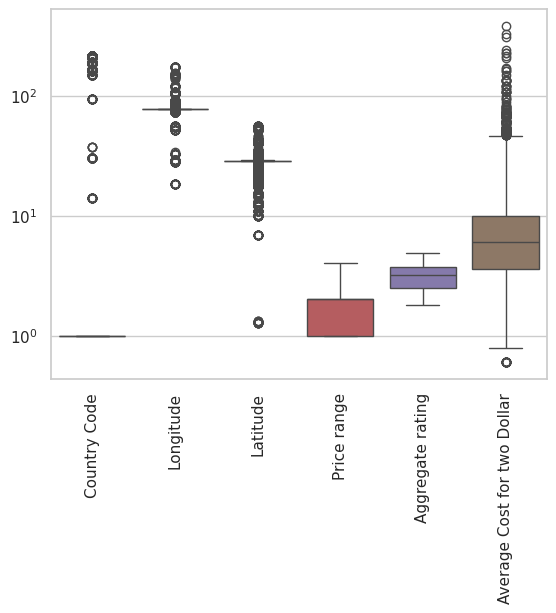

In [ ]:
sns.boxplot(data_numerica_sinId,log_scale=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_numerica_sinId.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Price range',
       'Aggregate rating', 'Average Cost for two Dollar'],
      dtype='object')

In [ ]:
data_numerica_sinId.head()['Aggregate rating']

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

In [ ]:
outlier_percentages = {}

for col in data_numerica_sinId.columns:
    Q1 = data_numerica_sinId[col].quantile(0.25)
    Q3 = data_numerica_sinId[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_numerica_sinId[(data_numerica_sinId[col] < lower_bound) | (data_numerica_sinId[col] > upper_bound)]
    percentage = len(outliers) / len(data_numerica_sinId) * 100
    outlier_percentages[col] = round(percentage, 2)

# Mostrar resultados
for col, perc in outlier_percentages.items():
    print(f"{col}: {perc}% outliers")


Country Code: 9.41% outliers
Longitude: 20.45% outliers
Latitude: 20.75% outliers
Price range: 6.14% outliers
Aggregate rating: 22.49% outliers
Average Cost for two Dollar: 10.75% outliers


In [ ]:
data_numerica_sinId.dtypes

Country Code                     int64
Longitude                      float64
Latitude                       float64
Price range                      int64
Aggregate rating               float64
Average Cost for two Dollar    float64
dtype: object

1. Diagnóstico de calidad de datos
Si una columna tiene un porcentaje alto de outliers (por ejemplo, más del 10%), podría indicar errores de medición, registros mal ingresados o datos extremos que deben ser tratados con cuidado.

2. Decisiones de limpieza
Puedes decidir si eliminar, reemplazar o conservar los outliers, dependiendo de su proporción:

- Si hay pocos (1-5%), se suelen eliminar sin mucho impacto.

- Si hay muchos (10% o más), quizá sea mejor transformarlos (como con logaritmos o normalización)


| Columna                    | % Outliers | Recomendación Mejorada |
|---------------------------|------------|--------------------------|
| **Longitude**             | 20.45%     | Alto. ⚠️ Revisa posibles errores de geolocalización. Considera eliminar outliers extremos usando IQR o ajustar con Winsorization. |
| **Latitude**              | 20.75%     | Alto. ⚠️ Posibles errores de entrada. Analiza valores fuera del rango habitual y aplica IQR o técnicas de limpieza geográfica. |
| **Country Code**  | 9.41%      | Moderado. Usa Winsorization para limitar extremos o transforma los datos (log) si hay asimetría. |
| **Price range**           | 6.14%      | Bajo. Puedes conservar los datos como están o aplicar IQR para una limpieza ligera. |
| **Aggregate rating**      | 22.49%     | Muy alto. Posible sesgo o valores atípicos en las calificaciones. Revisa la distribución, aplica IQR y considera una transformación logarítmica si es necesario. |
| **Average Cost for two Dollar** | 10.75% | Intermedio. Aplica log-transform si hay asimetría o winsoriza para suavizar los valores extremos. |


In [ ]:
col = 'Aggregate rating'
Q1 = data_numerica_sinId[col].quantile(0.25)
Q3 = data_numerica_sinId[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = data_numerica_sinId[(data_numerica_sinId[col] < lower) | (data_numerica_sinId[col] > upper)]

print(outliers[col].value_counts())
# De esta manera se los valores mas a la izquierda y los valores mas a la derecha
print(data_numerica_sinId[data_numerica_sinId['Aggregate rating'] == 0].shape[0])


Aggregate rating
0.0    2148
Name: count, dtype: int64
2148


In [ ]:
col = 'Votes'
Q1 = data_numerica[col].quantile(0.25)
Q3 = data_numerica[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = data_numerica[(data_numerica[col] < lower) | (data_numerica[col] > upper)]

print(outliers[col].value_counts())
print(data_numerica[data_numerica['Votes'] == 0].shape[0])
# De esta manera se los valores mas a la izquierda y los valores mas a la derecha


Votes
364     7
372     7
430     7
496     6
395     6
       ..
1640    1
1498    1
903     1
1476    1
1662    1
Name: count, Length: 691, dtype: int64
1094


En el dataset, el valor 0.0 en 'Aggregate rating' no representa una mala calificación, sino la ausencia de calificaciones. Esto se relaciona fuertemente con la columna 'Votes', ya que una parte importante de los restaurantes con rating 0.0 también tienen 0 votos, lo cual sugiere que aún no han sido evaluados por usuarios. Sin embargo, existe un subconjunto de restaurantes con rating 0.0 que sí tienen votos, lo que podría deberse a errores de datos o votaciones no válidas.

In [ ]:
# De existir, eliminar Outliers describiendo que tecnica(s) ha utilizado en cada caso

In [ ]:
# Me fijare de los pvalue, pero usaria sl stats.normaltest, ya que con este tiene mayor alcance, pues puedes ver almenos 8 datos o miles, y podemo analizar con precision el p_value
from scipy import stats

In [ ]:
# Crear un diccionario para guardar los p-values
pvalues = {}

# Recorrer todas las columnas numéricas del DataFrame
for col in data_numerica_sinId.columns:
    try:
        stat, p = stats.normaltest(data_numerica_sinId[col].dropna())
        pvalues[col] = p
    except Exception as e:
        pvalues[col] = f"Error: {e}"

# Mostrar los p-values
for col, p in pvalues.items():
    print(f"{col}: p-value = {p}")

Country Code: p-value = 0.0
Longitude: p-value = 0.0
Latitude: p-value = 0.0
Price range: p-value = 3.6399629723755897e-208
Aggregate rating: p-value = 7.133495140474911e-291
Average Cost for two Dollar: p-value = 0.0


### ¿Qué conclusiones generales podemos sacar?
1. Tus datos contienen varios valores atípicos importantes, especialmente en:

- Aggregate rating

- Longitude y Latitude

- Average Cost for two Dollar

2. Ninguna variable sigue una distribución normal, lo que te sugiere que:

- Debes tener cuidado con métodos estadísticos que asumen normalidad (por ejemplo, regresión lineal clásica sin transformaciones).

- Podrías considerar transformaciones (como logaritmo o Box-Cox) si necesitas normalizar alguna variable.

3. Outliers no necesariamente son errores:

- Por ejemplo, valores extremos de Longitude y Latitude pueden representar restaurantes en diferentes países o regiones.

- Ratings de 0 pueden representar falta de evaluación, como ya viste.



# Tratando Aggregate rating

In [ ]:
data_rating_Fata_Evaluacion = data_numerica_sinId[data_numerica_sinId['Aggregate rating'] == 0.0]
data_rating_real = data_numerica_sinId[data_numerica_sinId['Aggregate rating'] > 0.0]

In [ ]:
len(data_rating_Fata_Evaluacion['Aggregate rating'])

2148

In [ ]:
len(data_rating_real['Aggregate rating'])

7403

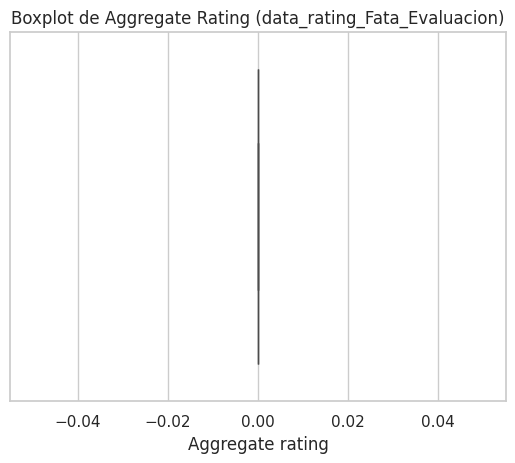

In [ ]:
sns.boxplot(x=data_rating_Fata_Evaluacion['Aggregate rating'])
# Añadir título y mostrar el gráfico
plt.title('Boxplot de Aggregate Rating (data_rating_Fata_Evaluacion)')
plt.show()

In [ ]:
ratings = data_rating_Fata_Evaluacion['Aggregate rating']

Q1 = ratings.quantile(0.25)
Q3 = ratings.quantile(0.75)
IQR = Q3 - Q1

# Límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Valores atípicos
outliers = ratings[(ratings < lower_bound) | (ratings > upper_bound)]
print(f"Cantidad de outliers: {len(outliers)}")

Cantidad de outliers: 0


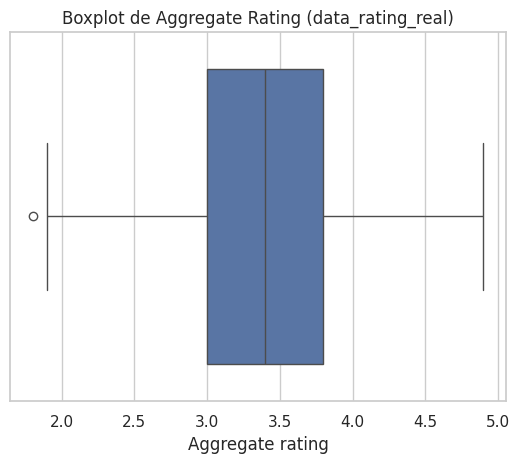

In [ ]:
sns.boxplot(x=data_rating_real['Aggregate rating'])
# Añadir título y mostrar el gráfico
plt.title('Boxplot de Aggregate Rating (data_rating_real)')
plt.show()

In [ ]:
ratings = data_rating_real['Aggregate rating']

Q1 = ratings.quantile(0.25)
Q3 = ratings.quantile(0.75)
IQR = Q3 - Q1

# Límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Valores atípicos
outliers = ratings[(ratings < lower_bound) | (ratings > upper_bound)]
print(f"Cantidad de outliers: {len(outliers)}")

Cantidad de outliers: 1


In [ ]:
# Creamos una nueva columna que clasifica cada fila
data_numerica_sinId['Tipo_Evaluacion'] = data_numerica_sinId['Aggregate rating'].apply(
    lambda x: 'Sin Evaluar' if x == 0.0 else 'Evaluada'
)


In [ ]:
data_rating_Falsa = data_numerica_sinId[data_numerica_sinId['Tipo_Evaluacion'] == 'Sin Evaluar']
data_rating_Real = data_numerica_sinId[data_numerica_sinId['Tipo_Evaluacion'] == 'Evaluada']


In [ ]:
data_numerica_sinId.head()

Country Code   Longitude   Latitude  Price range  Aggregate rating  \
0           162  121.027535  14.565443            3               4.8   
1           162  121.014101  14.553708            3               4.5   
2           162  121.056831  14.581404            4               4.4   
3           162  121.056475  14.585318            4               4.9   
4           162  121.057508  14.584450            4               4.8   

   Average Cost for two Dollar Tipo_Evaluacion  
0                         19.8        Evaluada  
1                         21.6        Evaluada  
2                         72.0        Evaluada  
3                         27.0        Evaluada  
4                         27.0        Evaluada

In [ ]:
len(data_numerica_sinId)

9551

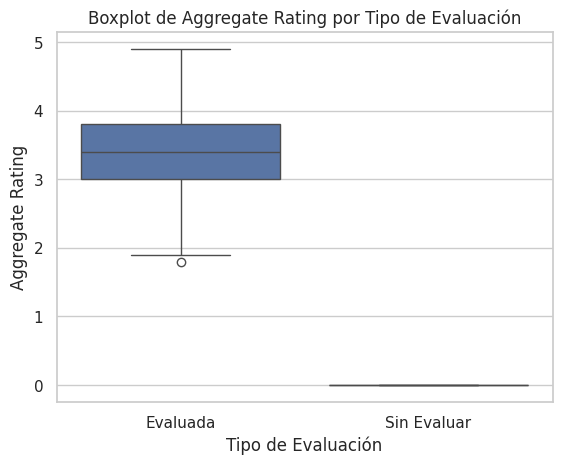

In [ ]:
sns.boxplot(x='Tipo_Evaluacion', y='Aggregate rating', data=data_numerica_sinId)
plt.title("Boxplot de Aggregate Rating por Tipo de Evaluación")
plt.xlabel("Tipo de Evaluación")
plt.ylabel("Aggregate Rating")
plt.show()


# Tratando Average Cost for two Dollar

### Aplicaremos tranformacion logaritmica, pero primero debemos saber si tenemos valores con 0

In [ ]:
# Ver cuántos valores son menores o iguales a 0
print((data_numerica_sinId['Average Cost for two Dollar'] <= 0).sum())

18


In [ ]:
# Si hay ceros, podés usar log1p (log(x + 1)), o directamente log(x) si estás seguro que todos son positivos
data_numerica_sinId['log_Average_Cost'] = np.log1p(data_numerica_sinId['Average Cost for two Dollar'])


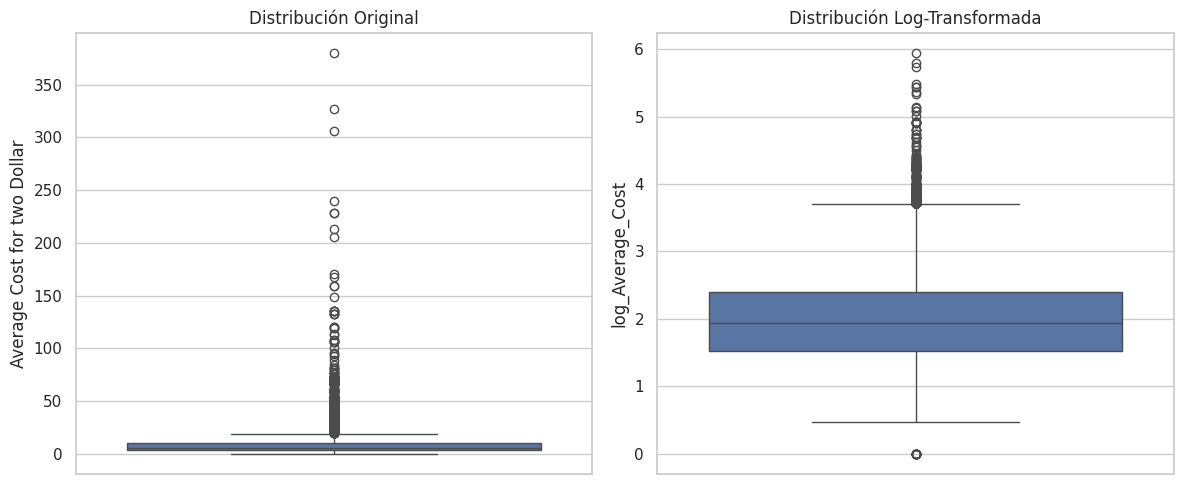

In [ ]:
# Original
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(data_numerica_sinId['Average Cost for two Dollar'])
plt.title("Distribución Original")

# Log-transformada
plt.subplot(1, 2, 2)
sns.boxplot(data_numerica_sinId['log_Average_Cost'])
plt.title("Distribución Log-Transformada")

plt.tight_layout()
plt.show()

In [ ]:
ratings = data_numerica_sinId['log_Average_Cost']

Q1 = ratings.quantile(0.25)
Q3 = ratings.quantile(0.75)
IQR = Q3 - Q1

# Límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Valores atípicos
outliers = ratings[(ratings < lower_bound) | (ratings > upper_bound)]
print(f"Cantidad de outliers: {len(outliers)}")

Cantidad de outliers: 368


In [ ]:
data_numerica_sinId.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Price range',
       'Aggregate rating', 'Average Cost for two Dollar', 'Tipo_Evaluacion',
       'log_Average_Cost'],
      dtype='object')

<ipython-input-2297-5a839d718099>:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



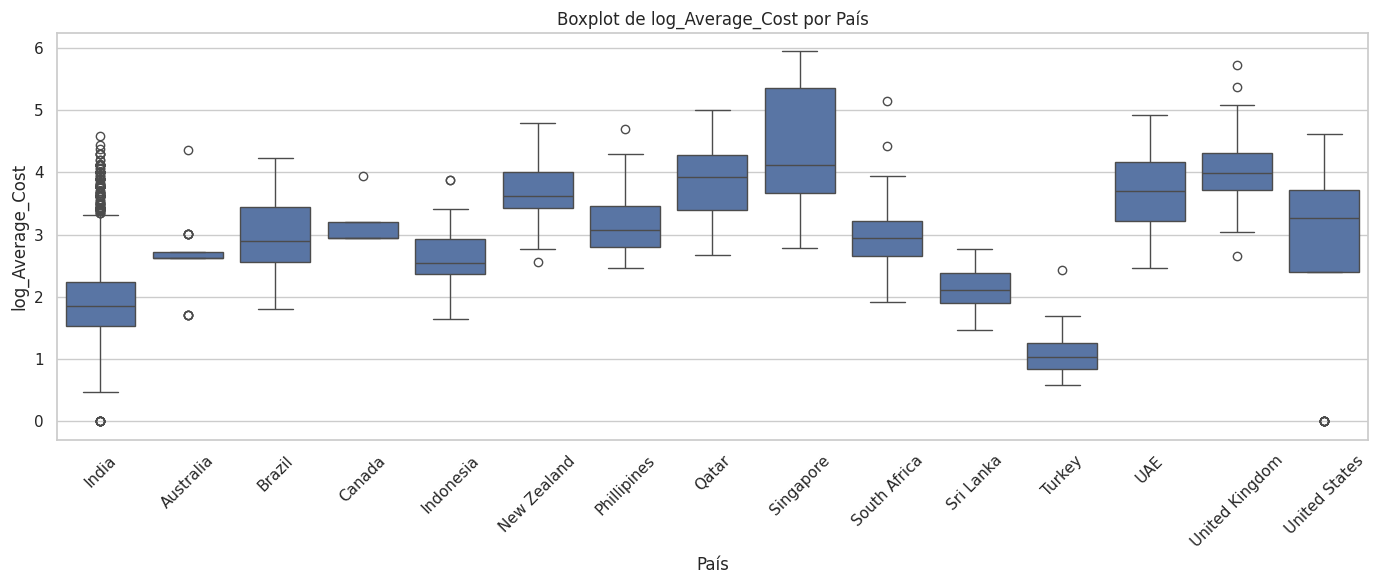

In [ ]:
# Diccionario para mapear los códigos a nombres
codigo_a_pais = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States"
}

# Crear el gráfico
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='Country Code', y='log_Average_Cost', data=data_numerica_sinId)

# Cambiar etiquetas del eje X por los nombres de los países
country_codes_sorted = sorted(data_numerica_sinId['Country Code'].unique())
country_labels = [codigo_a_pais.get(code, f"Code {code}") for code in country_codes_sorted]
ax.set_xticklabels(country_labels, rotation=45)

# Títulos
plt.title("Boxplot de log_Average_Cost por País")
plt.xlabel("País")
plt.ylabel("log_Average_Cost")
plt.tight_layout()
plt.show()


#### Ahora queremos saber como se distrubuyen los outliers en cada pais, pero sin eliminar data.

In [ ]:
# 1. Calcular Q1 y Q3
Q1 = data_numerica_sinId['log_Average_Cost'].quantile(0.25)
Q3 = data_numerica_sinId['log_Average_Cost'].quantile(0.75)

# 2. Calcular IQR
IQR = Q3 - Q1

# 3. Definir los límites inferior y superior para valores normales
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Detectar outliers y marcarlos en una nueva columna booleana
data_numerica_sinId['log_Average_Cost_outlier'] = ~data_numerica_sinId['log_Average_Cost'].between(lower_bound, upper_bound)


In [ ]:
data_numerica_sinId.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Price range',
       'Aggregate rating', 'Average Cost for two Dollar', 'Tipo_Evaluacion',
       'log_Average_Cost', 'log_Average_Cost_outlier'],
      dtype='object')

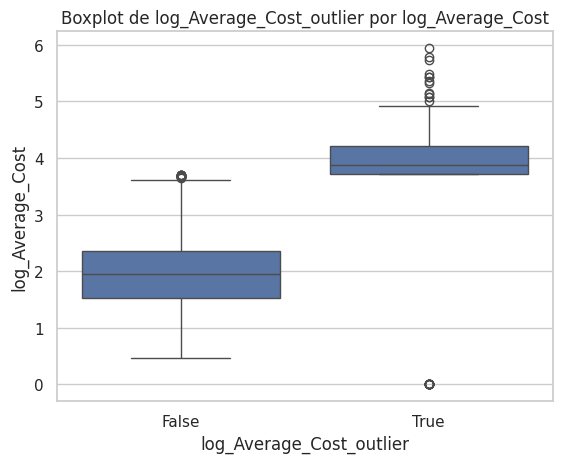

In [ ]:
sns.boxplot(x='log_Average_Cost_outlier', y='log_Average_Cost', data=data_numerica_sinId)
plt.title("Boxplot de log_Average_Cost_outlier por log_Average_Cost")
plt.xlabel("log_Average_Cost_outlier")
plt.ylabel("log_Average_Cost")
plt.show()


<ipython-input-2301-82123727fbfb>:37: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



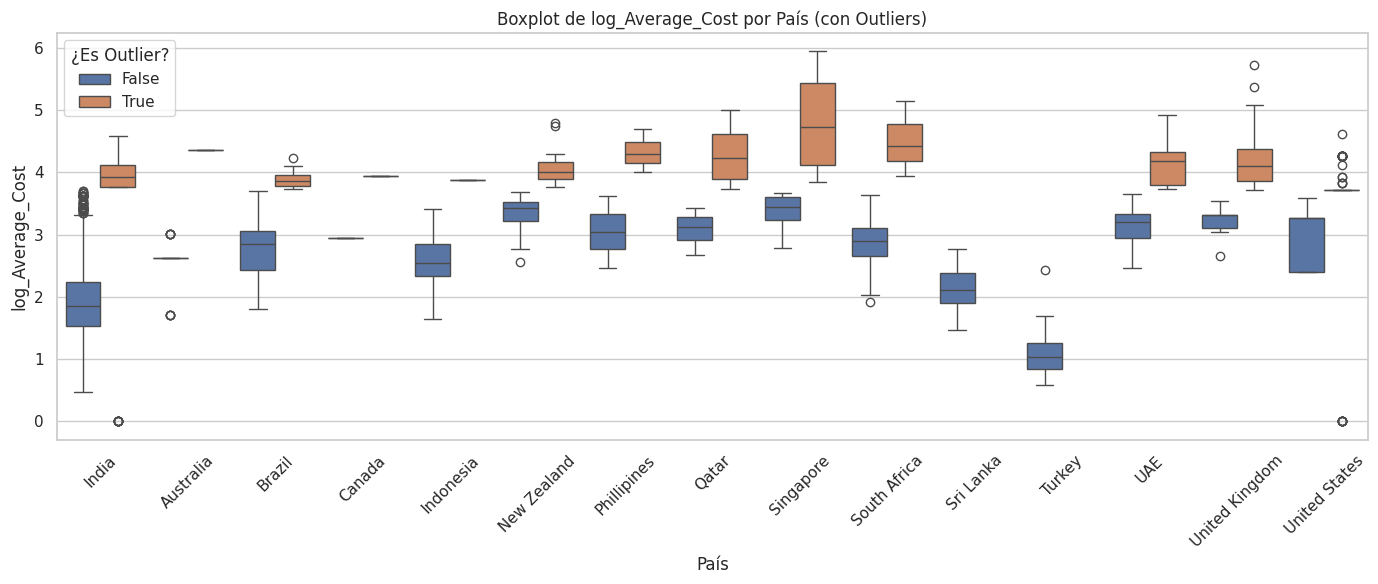

In [ ]:
# Diccionario con el mapeo
codigo_a_pais = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States"
}

# Crear el boxplot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    x='Country Code',
    y='log_Average_Cost',
    hue='log_Average_Cost_outlier',  # o 'es_outlier'
    data=data_numerica_sinId
)
plt.title("Boxplot de log_Average_Cost por País (con Outliers)")
plt.xlabel("País")
plt.ylabel("log_Average_Cost")
plt.legend(title='¿Es Outlier?')

# Cambiar etiquetas del eje X por nombres de países
country_codes_sorted = sorted(data_numerica_sinId['Country Code'].unique())
country_labels = [codigo_a_pais.get(code, f"Code {code}") for code in country_codes_sorted]

ax.set_xticklabels(country_labels, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
data_numerica_sinId.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Price range',
       'Aggregate rating', 'Average Cost for two Dollar', 'Tipo_Evaluacion',
       'log_Average_Cost', 'log_Average_Cost_outlier'],
      dtype='object')

# Observando longitude y Latitude

In [ ]:
data_numerica_sinId = data_numerica_sinId.merge(data_completa[['Country']], left_index=True, right_index=True, how='left')

In [ ]:
data_numerica_sinId = data_numerica_sinId.merge(data_completa[['Restaurant Name']], left_index=True, right_index=True, how='left')

In [ ]:
data_numerica_sinId = data_numerica_sinId.drop('Country Code', axis=1)


In [ ]:
data_numerica_sinId = data_numerica_sinId.drop('Average Cost for two Dollar', axis=1)

In [ ]:
data_numerica_sinId.columns

Index(['Longitude', 'Latitude', 'Price range', 'Aggregate rating',
       'Tipo_Evaluacion', 'log_Average_Cost', 'log_Average_Cost_outlier',
       'Country', 'Restaurant Name'],
      dtype='object')

In [ ]:
# Para Latitude
Q1_lat = data_numerica_sinId['Latitude'].quantile(0.25)
Q3_lat = data_numerica_sinId['Latitude'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

# Identificar outliers en Latitude
outliers_lat = data_numerica_sinId[(data_numerica_sinId['Latitude'] < lower_bound_lat) | (data_numerica_sinId['Latitude'] > upper_bound_lat)]
num_outliers_lat = outliers_lat.shape[0]

# Para Longitude
Q1_lon = data_numerica_sinId['Longitude'].quantile(0.25)
Q3_lon = data_numerica_sinId['Longitude'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon
lower_bound_lon = Q1_lon - 1.5 * IQR_lon
upper_bound_lon = Q3_lon + 1.5 * IQR_lon

# Identificar outliers en Longitude
outliers_lon = data_numerica_sinId[(data_numerica_sinId['Longitude'] < lower_bound_lon) | (data_numerica_sinId['Longitude'] > upper_bound_lon)]
num_outliers_lon = outliers_lon.shape[0]

# Mostrar resultados
print(f"Cantidad de outliers en Latitude: {num_outliers_lat}")
print(f"Cantidad de outliers en Longitude: {num_outliers_lon}")


Cantidad de outliers en Latitude: 1982
Cantidad de outliers en Longitude: 1953


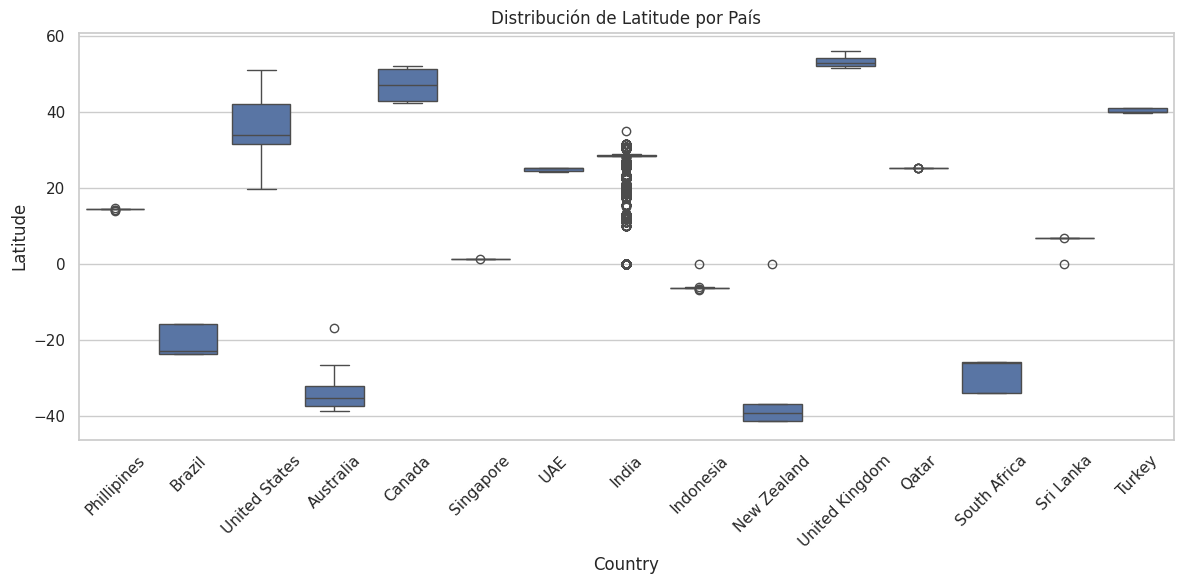

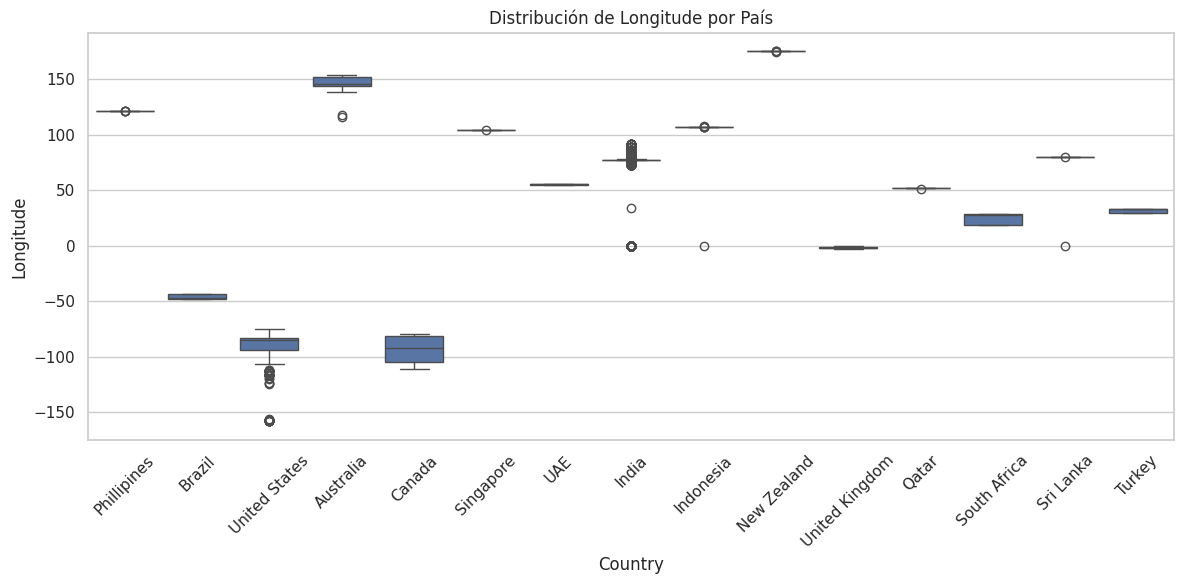

In [ ]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")
# Crear boxplot para Latitude por Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Latitude', data=data_numerica_sinId)
plt.title('Distribución de Latitude por País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crear boxplot para Longitude por Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Longitude', data=data_numerica_sinId)
plt.title('Distribución de Longitude por País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_numerica_sinId.groupby("Country")["Latitude"].describe()


count       mean       std        min        25%        50%  \
Country                                                                        
Australia         24.0 -33.764464  5.340784 -38.634746 -37.403504 -35.296265   
Brazil            60.0 -20.780126  3.554760 -23.622925 -23.556303 -22.969360   
Canada             4.0  47.200881  5.111186  42.397683  42.989573  47.198776   
India           8652.0  26.420652  6.976576   0.000000  28.491425  28.569869   
Indonesia         21.0  -5.980983  1.382903  -6.887058  -6.244221  -6.224333   
New Zealand       40.0 -38.156311  6.572330 -41.330428 -41.293208 -39.094221   
Phillipines       22.0  14.518302  0.137139  14.101834  14.545706  14.559902   
Qatar             20.0  25.286205  0.030048  25.224394  25.272491  25.278823   
Singapore         20.0   1.293916  0.013468   1.278373   1.282488   1.290691   
South Africa      60.0 -28.605570  3.797348 -33.979757 -33.907983 -26.133632   
Sri Lanka         20.0   6.559149  1.543970   0.000000   6.894789   6.906814   
Turkey            34.0  40.369036  0.561840  39.876239  39.906122  39.917915   
UAE               60.0  24.995730  0.384652  24.334217  24.490296  25.211143   
United Kingdom    80.0  53.354745  1.664095  51.485509  52.214106  52.978000   
United States    434.0  35.616102  6.244411  19.642752  31.609154  33.960067   

                      75%        max  
Country                               
Australia      -32.174752 -16.748083  
Brazil         -15.833719 -15.720118  
Canada          51.410084  52.008289  
India           28.637857  35.000000  
Indonesia       -6.196270   0.000000  
New Zealand    -36.851225   0.000000  
Phillipines     14.583174  14.649503  
Qatar           25.286850  25.350325  
Singapore        1.300730   1.331128  
South Africa   -25.785435 -25.761238  
Sri Lanka        6.912599   6.932814  
Turkey          41.022877  41.104969  
UAE             25.308901  25.355083  
United Kingdom  54.120619  55.976980  
United States   42.048284  51.183934

In [ ]:
data_numerica_sinId.groupby("Country")["Longitude"].describe()


count        mean        std         min         25%  \
Country                                                                 
Australia         24.0  144.601833   9.599283  115.984492  144.011125   
Brazil            60.0  -45.932703   2.002508  -48.019092  -47.882269   
Canada             4.0  -93.700900  15.339589 -110.774699 -104.539663   
India           8652.0   72.856786  18.017536    0.000000   77.098797   
Indonesia         21.0  101.757266  23.316241    0.000000  106.800144   
New Zealand       40.0  174.770018   0.027064  174.635633  174.763928   
Phillipines       22.0  121.036126   0.033584  120.951589  121.029049   
Qatar             20.0   51.512866   0.040534   51.350047   51.509771   
Singapore         20.0  103.848734   0.015219  103.807081  103.841482   
South Africa      60.0   24.905097   4.621797   18.381997   18.422480   
Sri Lanka         20.0   75.867950  17.857468    0.000000   79.851873   
Turkey            34.0   31.256299   1.902795   28.976127   29.034985   
UAE               60.0   55.026086   0.447865   54.357829   54.405593   
United Kingdom    80.0   -1.865950   1.114922   -3.208363   -2.483957   
United States    434.0  -92.967923  17.268485 -157.948486  -93.601909   

                       50%         75%         max  
Country                                             
Australia       145.699741  151.586076  153.593331  
Brazil          -46.662354  -43.226667  -43.162667  
Canada          -92.324878  -81.486115  -79.379147  
India            77.203468   77.285356   91.806493  
Indonesia       106.813400  106.831748  107.612790  
New Zealand     174.774729  174.779167  174.832089  
Phillipines     121.053612  121.056770  121.075419  
Qatar            51.520286   51.530066   51.546714  
Singapore       103.854736  103.859555  103.862120  
South Africa     28.023086   28.255827   28.332471  
Sri Lanka        79.856413   79.866352   79.902941  
Turkey           32.769816   32.854985   32.869800  
UAE              55.278924   55.376113   55.460279  
United Kingdom   -2.068674   -1.425631   -0.076581  
United States   -85.177505  -83.378425  -74.651139

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


fig = px.scatter_mapbox(
    data_numerica_sinId,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    # hover_data=["Country", "City"],  # Removed "City" from hover_data as it does not exist in the DataFrame
    hover_data=["Country"],  # Changed hover_data to use only available columns
    color="Country",
    zoom=1,
    height=600,
    width=1000,
    mapbox_style="open-street-map"
)

fig.update_layout(
    title="Ubicaciones de Restaurantes por País",
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [ ]:
  data_numerica_sinId.columns

Index(['Longitude', 'Latitude', 'Price range', 'Aggregate rating',
       'Tipo_Evaluacion', 'log_Average_Cost', 'log_Average_Cost_outlier',
       'Country', 'Restaurant Name'],
      dtype='object')

In [ ]:
data_numerica_sinId = data_numerica_sinId.drop(['Longitude', 'Latitude'], axis=1)


In [ ]:
data_numerica_sinId = data_numerica_sinId.merge(data_completa[['Has Table booking']], left_index=True, right_index=True, how='left')
data_numerica_sinId = data_numerica_sinId.merge(data_completa[['City']], left_index=True, right_index=True, how='left')
data_numerica_sinId = data_numerica_sinId.merge(data_completa[['Votes']], left_index=True, right_index=True, how='left')
data_numerica_sinId = data_numerica_sinId.merge(data_completa[['Has Online delivery']], left_index=True, right_index=True, how='left')

In [ ]:
print(data_numerica_sinId.columns)


Index(['Price range', 'Aggregate rating', 'Tipo_Evaluacion',
       'log_Average_Cost', 'log_Average_Cost_outlier', 'Country',
       'Restaurant Name', 'Has Table booking', 'City', 'Votes',
       'Has Online delivery'],
      dtype='object')


In [ ]:
# Genere un dataset con los datos preparados

In [ ]:
data_preparada = data_numerica_sinId.copy()

In [ ]:
data_preparada.to_csv('data_preparada.csv', index=False)

In [ ]:
data_preparada=pd.read_csv('data_preparada.csv')

In [ ]:
data_preparada.head()

Price range  Aggregate rating Tipo_Evaluacion  log_Average_Cost  \
0            3               4.8        Evaluada          3.034953   
1            3               4.5        Evaluada          3.117950   
2            4               4.4        Evaluada          4.290459   
3            4               4.9        Evaluada          3.332205   
4            4               4.8        Evaluada          3.332205   

   log_Average_Cost_outlier      Country         Restaurant Name  \
0                     False  Phillipines        Le Petit Souffle   
1                     False  Phillipines        Izakaya Kikufuji   
2                      True  Phillipines  Heat - Edsa Shangri-La   
3                     False  Phillipines                    Ooma   
4                     False  Phillipines             Sambo Kojin   

  Has Table booking              City  Votes Has Online delivery  
0               Yes       Makati City    314                  No  
1               Yes       Makati City    591                  No  
2               Yes  Mandaluyong City    270                  No  
3                No  Mandaluyong City    365                  No  
4               Yes  Mandaluyong City    229                  No

A partir de los datos preparados, trabaje las siguientes secciones.

####**4. ESTADISTICA DESCRIPTIVA**

In [ ]:
# A partir del dataset preparado, mostrar detalles estadísticos básicos

# Mostrar estadísticas básicas
print("=== Estadísticas Básicas ===")
print(data_preparada.describe())



=== Estadísticas Básicas ===
       Price range  Aggregate rating  log_Average_Cost         Votes
count  9551.000000       9551.000000       9551.000000   9551.000000
mean      1.804837          2.666370          2.035495    156.909748
std       0.905609          1.516378          0.743614    430.169145
min       1.000000          0.000000          0.000000      0.000000
25%       1.000000          2.500000          1.526056      5.000000
50%       2.000000          3.200000          1.945910     31.000000
75%       2.000000          3.700000          2.397895    131.000000
max       4.000000          4.900000          5.942799  10934.000000


In [ ]:
#Identificar y separar variables numéricas y categóricas
# Columnas numéricas
numericas = data_preparada.select_dtypes(include=['number'])

# Columnas no numéricas
no_numericas = data_preparada.select_dtypes(exclude=['number'])

# Mostrar los resultados
print("Columnas numéricas:")
print(numericas.columns.tolist())

print("\nColumnas no numéricas:")
print(no_numericas.columns.tolist())


Columnas numéricas:
['Price range', 'Aggregate rating', 'log_Average_Cost', 'Votes']

Columnas no numéricas:
['Tipo_Evaluacion', 'log_Average_Cost_outlier', 'Country', 'Restaurant Name', 'Has Table booking', 'City', 'Has Online delivery']


####**4.1 Análisis Univariado de los Datos**

#### **Diagramas de pares y diagramas de distribución**

In [ ]:
# Generar estadísticas descriptivas para columnas numéricas

# Mostrar estadísticas básicas
print("=== Estadísticas Básicas ===")
print(numericas.describe())

# Mostrar media, mediana y moda para cada columna numérica
print("\n=== Mediana y Moda ===")
for columna in numericas.columns:
    print(f"\nColumna: {columna}")
    print(f"  Mediana: {numericas[columna].median()}")
    print(f"  Moda: {numericas[columna].mode()[0]}")



=== Estadísticas Básicas ===
       Price range  Aggregate rating  log_Average_Cost         Votes
count  9551.000000       9551.000000       9551.000000   9551.000000
mean      1.804837          2.666370          2.035495    156.909748
std       0.905609          1.516378          0.743614    430.169145
min       1.000000          0.000000          0.000000      0.000000
25%       1.000000          2.500000          1.526056      5.000000
50%       2.000000          3.200000          1.945910     31.000000
75%       2.000000          3.700000          2.397895    131.000000
max       4.000000          4.900000          5.942799  10934.000000

=== Mediana y Moda ===

Columna: Price range
  Mediana: 2.0
  Moda: 1

Columna: Aggregate rating
  Mediana: 3.2
  Moda: 0.0

Columna: log_Average_Cost
  Mediana: 1.9459101490553128
  Moda: 1.9459101490553128

Columna: Votes
  Mediana: 31.0
  Moda: 0


In [ ]:
# Generar estadísticas descriptivas para columnas categóricas
# Si No hay variables categoricas, considere crear algunas

no_numericas.describe()

Tipo_Evaluacion log_Average_Cost_outlier Country  Restaurant Name  \
count             9551                     9551    9551             9551   
unique               2                        2      15             7446   
top           Evaluada                    False   India  Cafe Coffee Day   
freq              7403                     9183    8652               83   

       Has Table booking       City Has Online delivery  
count               9551       9551                9551  
unique                 2        141                   2  
top                   No  New Delhi                  No  
freq                8393       5473                7100

In [ ]:
# Utilice algunas de las medidas de dispersion y representelas a traves de diagramas
# Creando un diagrama de pares y de distribucion para variables numéricas



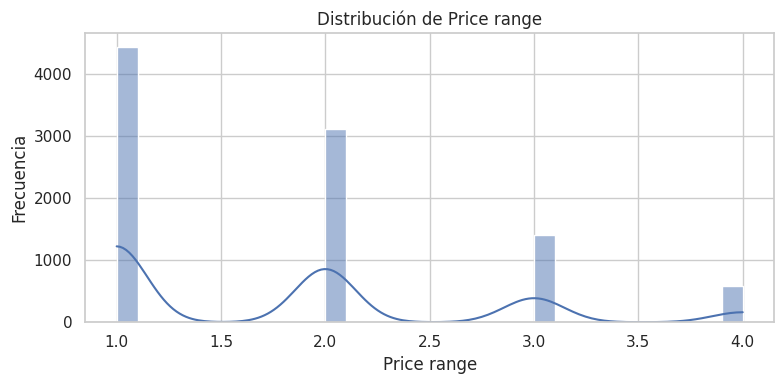

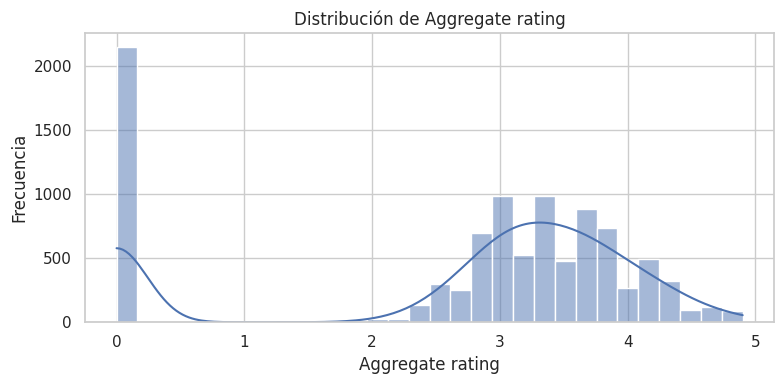

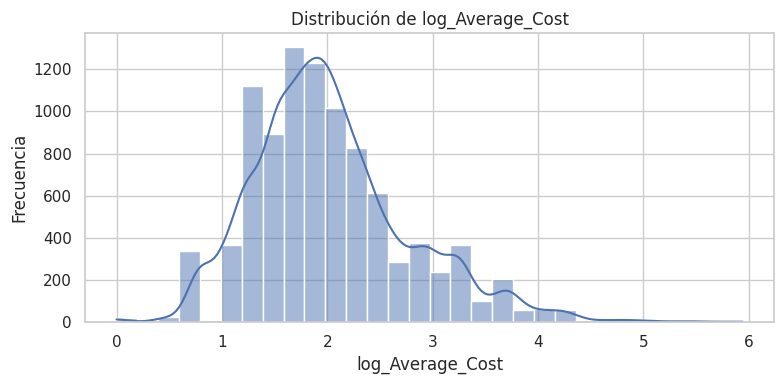

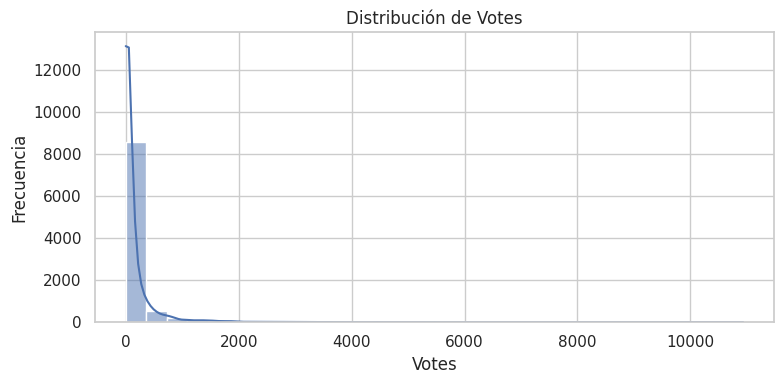

In [ ]:
# Diagrama de distribución para cada variable numérica
for col in numericas.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numericas[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


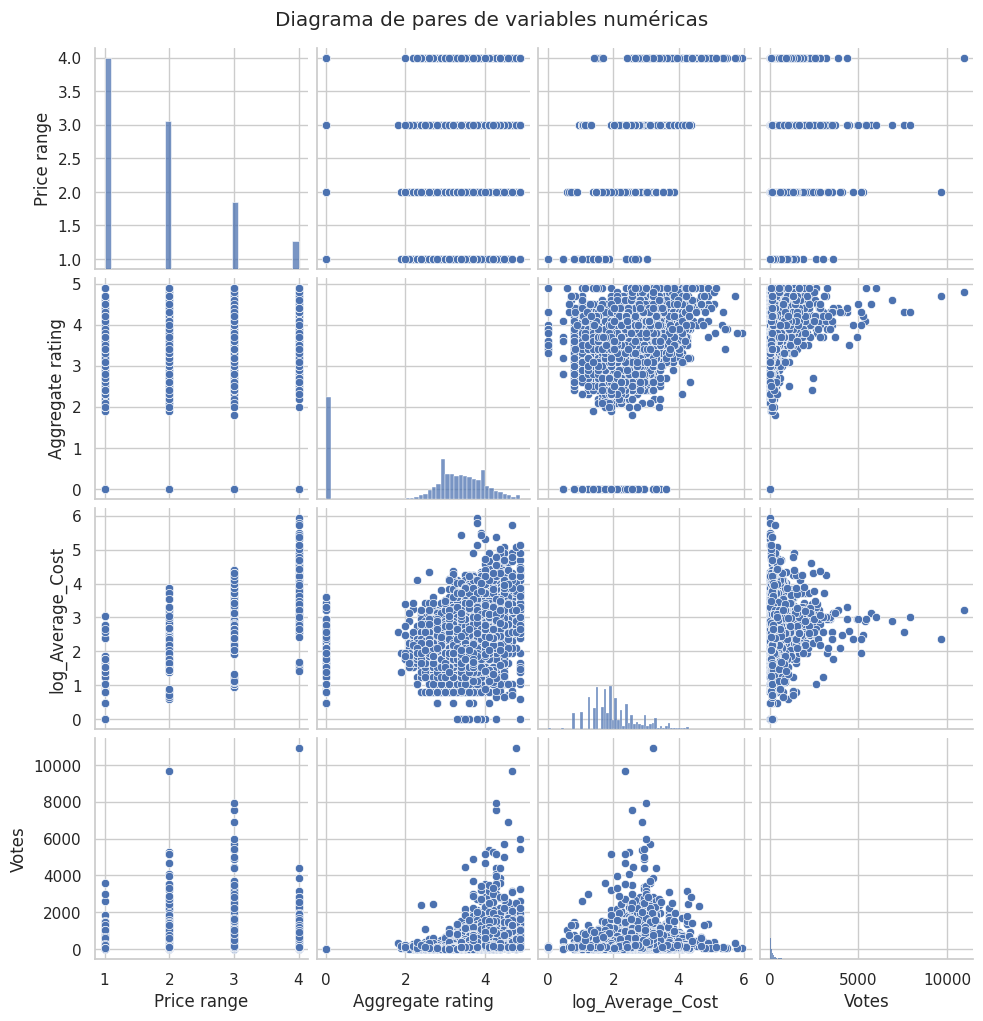

In [ ]:
# Muestra relaciones por pares (scatter + histograma)
sns.pairplot(numericas)
plt.suptitle('Diagrama de pares de variables numéricas', y=1.02)
plt.show()


####**4.2 Análisis Bivariado de los Datos**

#### **- Correlacion de variables**

In [ ]:
# Calcular e imprimir la matriz de correlación para variables numéricas.


In [ ]:
# Calcular la matriz de correlación
correlation_matrix = numericas.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación entre las variables numéricas:")
print(correlation_matrix)


Matriz de correlación entre las variables numéricas:
                  Price range  Aggregate rating  log_Average_Cost     Votes
Price range          1.000000          0.437944          0.849808  0.309444
Aggregate rating     0.437944          1.000000          0.470607  0.313691
log_Average_Cost     0.849808          0.470607          1.000000  0.312674
Votes                0.309444          0.313691          0.312674  1.000000


In [ ]:
# Visualizar la matriz de correlacion en un mapa de calor


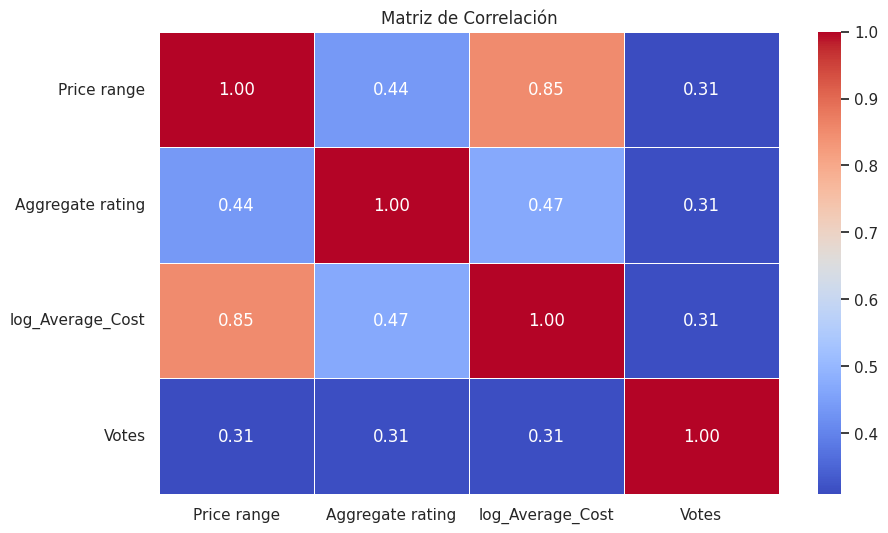

In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

¿Qué variables son las tienen mayor correlación?

In [ ]:
#Identifique las variables numericas que guardan una correlacion superior a 0.6

**Respuesta:**

En la **matriz de correlación** que proporcionaste, las variables numéricas que tienen una **correlación superior a 0.6** son:

1. **Price range** y **log_Average_Cost**: Correlación de **0.849808**

Esta unica combinacion tienen una correlación significativa superior a 0.6. Si estás buscando variables muy relacionadas, estas son las que podrían ser consideradas.


### **5. Visualización de los datos**

In [ ]:
data_preparada.columns

Index(['Price range', 'Aggregate rating', 'Tipo_Evaluacion',
       'log_Average_Cost', 'log_Average_Cost_outlier', 'Country',
       'Restaurant Name', 'Has Table booking', 'City', 'Votes',
       'Has Online delivery'],
      dtype='object')

In [ ]:
data_preparada.head()

Price range  Aggregate rating Tipo_Evaluacion  log_Average_Cost  \
0            3               4.8        Evaluada          3.034953   
1            3               4.5        Evaluada          3.117950   
2            4               4.4        Evaluada          4.290459   
3            4               4.9        Evaluada          3.332205   
4            4               4.8        Evaluada          3.332205   

   log_Average_Cost_outlier      Country         Restaurant Name  \
0                     False  Phillipines        Le Petit Souffle   
1                     False  Phillipines        Izakaya Kikufuji   
2                      True  Phillipines  Heat - Edsa Shangri-La   
3                     False  Phillipines                    Ooma   
4                     False  Phillipines             Sambo Kojin   

  Has Table booking              City  Votes Has Online delivery  
0               Yes       Makati City    314                  No  
1               Yes       Makati City    591                  No  
2               Yes  Mandaluyong City    270                  No  
3                No  Mandaluyong City    365                  No  
4               Yes  Mandaluyong City    229                  No

In [ ]:
data_preparada.dtypes

Price range                   int64
Aggregate rating            float64
Tipo_Evaluacion              object
log_Average_Cost            float64
log_Average_Cost_outlier       bool
Country                      object
Restaurant Name              object
Has Table booking            object
City                         object
Votes                         int64
Has Online delivery          object
dtype: object

In [ ]:
#Grafico de barras descendente de paises que componen el dataset totalizando por cntidada de reservaciones

<ipython-input-2338-4c8195c0a412>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




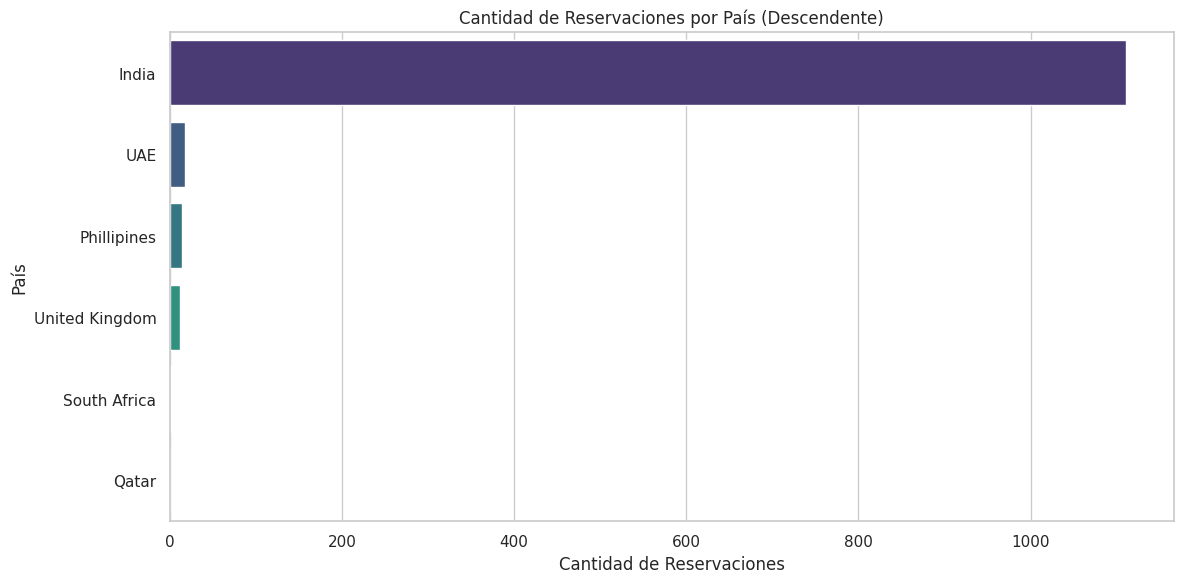

In [ ]:
# Filtrar por restaurantes que permiten reservas
reservas_por_pais = data_preparada[data_preparada['Has Table booking'] == 'Yes']

# Agrupar por país y contar
reservas_pais = reservas_por_pais['Country'].value_counts().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=reservas_pais.values, y=reservas_pais.index, palette="viridis")
plt.title('Cantidad de Reservaciones por País (Descendente)')
plt.xlabel('Cantidad de Reservaciones')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar y contar reservaciones por país
reservas_por_pais = data_preparada[data_preparada['Has Table booking'] == 'Yes']
conteo_reservas = reservas_por_pais['Country'].value_counts()

# Mostrar los resultados
print("Cantidad de reservaciones por país:")
print(conteo_reservas)

Cantidad de reservaciones por país:
Country
India             1111
UAE                 18
Phillipines         14
United Kingdom      12
South Africa         2
Qatar                1
Name: count, dtype: int64


In [ ]:
#Visualizar los 3 paises top con mayor cantidad de reservaciones (seniale que pais recibe la mayor cantidad de reservas).
# Grafico de barras o pie

In [ ]:
# Top 3 países con más reservaciones
top_3_reservas = conteo_reservas.head(3)

# Mostrar el país con más reservas
print(f"➡️ El país con mayor cantidad de reservaciones es: {top_3_reservas.idxmax()} con {top_3_reservas.max()} reservas")

➡️ El país con mayor cantidad de reservaciones es: India con 1111 reservas


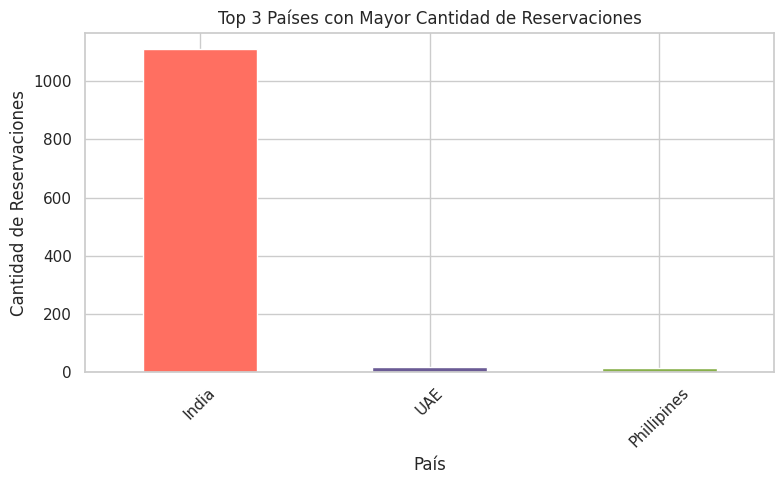

In [ ]:
plt.figure(figsize=(8, 5))
top_3_reservas.plot(kind='bar', color=['#FF6F61', '#6B5B95', '#88B04B'])
plt.title('Top 3 Países con Mayor Cantidad de Reservaciones')
plt.xlabel('País')
plt.ylabel('Cantidad de Reservaciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

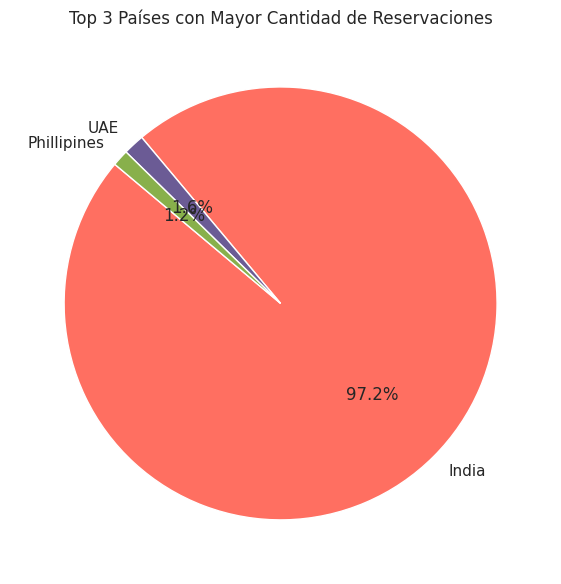

In [ ]:
plt.figure(figsize=(6, 6))
top_3_reservas.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF6F61', '#6B5B95', '#88B04B'])
plt.title('Top 3 Países con Mayor Cantidad de Reservaciones')
plt.ylabel('')  # Oculta el label del eje y
plt.tight_layout()
plt.show()

In [ ]:
# Top 4 ciudades del pais con mayor cantidad de ordenes (identifique cual es la ciudad con el mayor numero de ordenes)
# Grafico de barras o pie

➡️ El país con más órdenes online es: India (2423 órdenes)


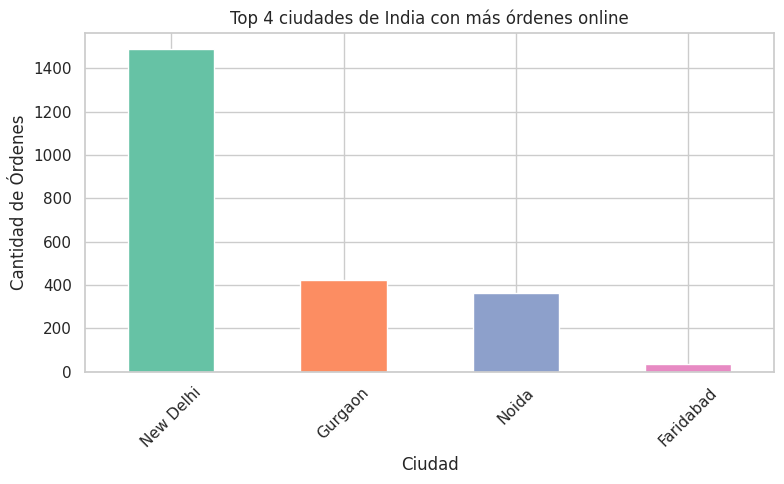

In [ ]:
# 1. Filtrar restaurantes que tienen entregas online
online_delivery = data_preparada[data_preparada['Has Online delivery'] == 'Yes']

# 2. Contar órdenes por país
ordenes_por_pais = online_delivery['Country'].value_counts()

# 3. Obtener el país con mayor cantidad de órdenes
pais_top = ordenes_por_pais.idxmax()
print(f"➡️ El país con más órdenes online es: {pais_top} ({ordenes_por_pais.max()} órdenes)")

# 4. Filtrar las ciudades de ese país
ciudades_pais_top = online_delivery[online_delivery['Country'] == pais_top]['City'].value_counts().head(4)

# 5. Gráfico de barras
plt.figure(figsize=(8,5))
ciudades_pais_top.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title(f"Top 4 ciudades de {pais_top} con más órdenes online")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de Órdenes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


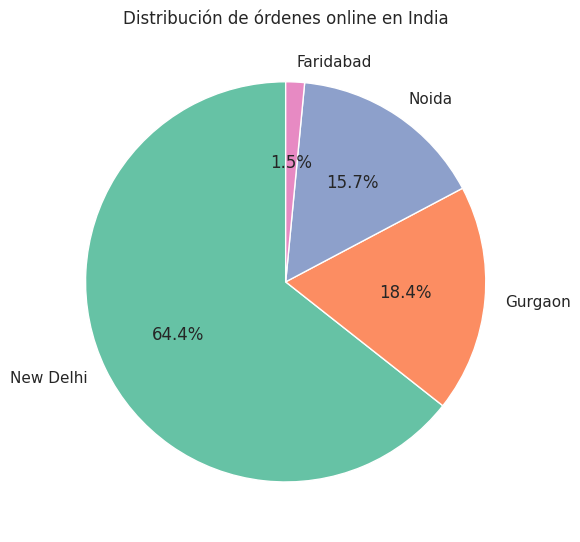

In [ ]:
plt.figure(figsize=(6,6))
ciudades_pais_top.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title(f"Distribución de órdenes online en {pais_top}")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
# Visualizar como es la distribucion de los valores de rating en general


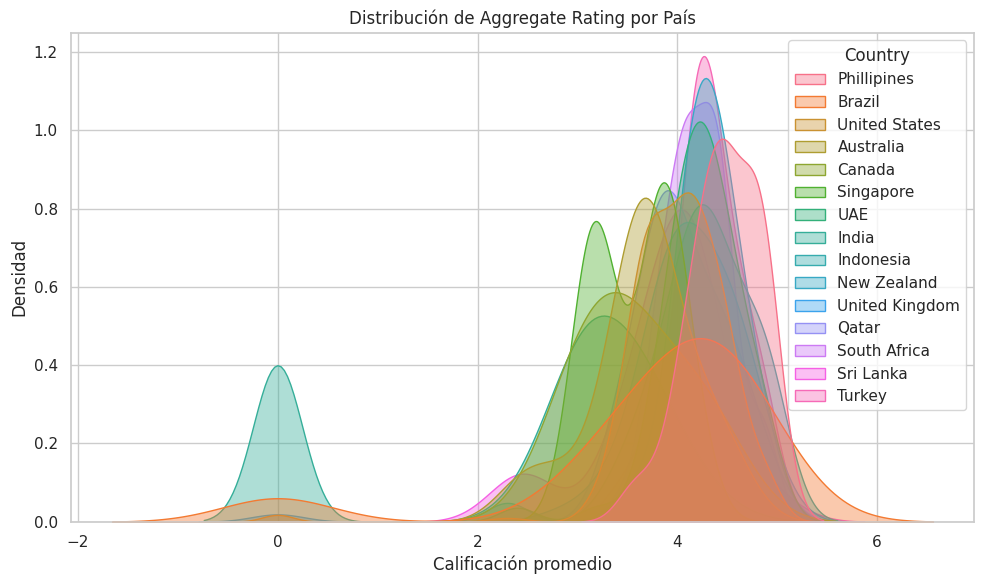

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_preparada, x='Aggregate rating', hue='Country', fill=True, common_norm=False, alpha=0.4)
plt.title("Distribución de Aggregate Rating por País")
plt.xlabel("Calificación promedio")
plt.ylabel("Densidad")
plt.grid(True)
plt.tight_layout()
plt.show()


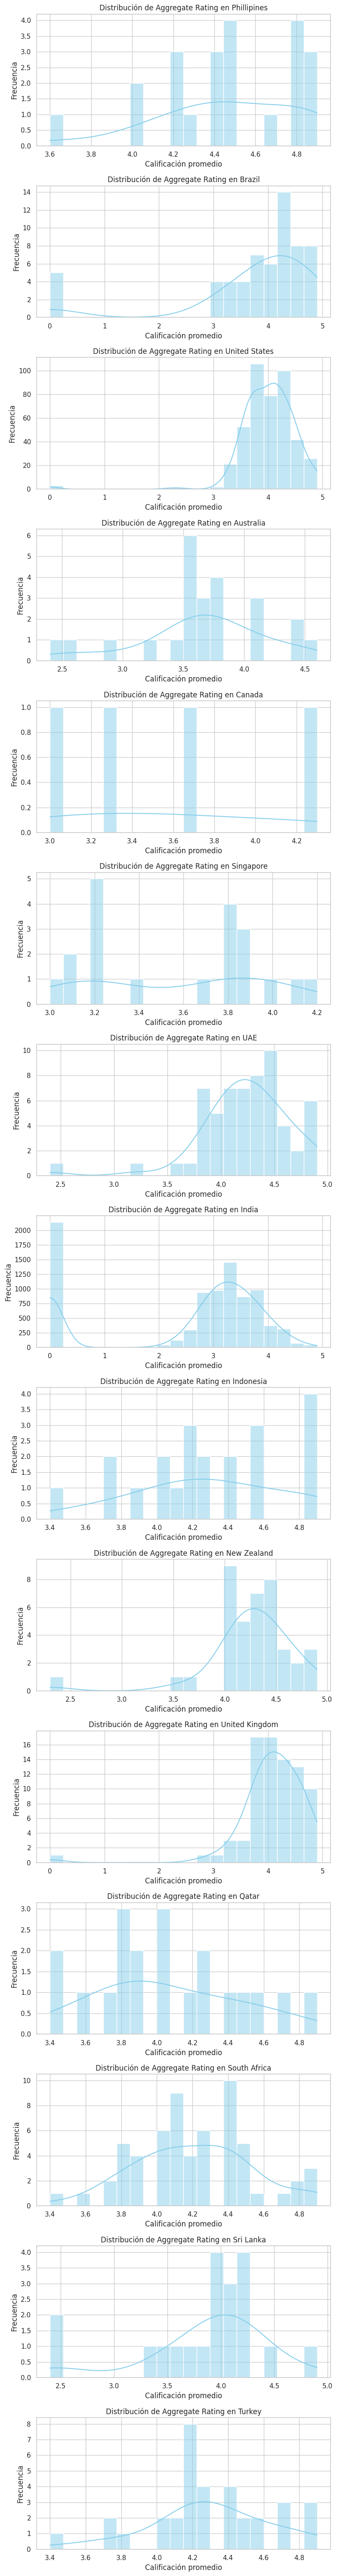

In [ ]:
# Lista de países únicos
paises = data_preparada['Country'].unique()

# Tamaño del gráfico según cantidad de países
n = len(paises)
fig, axes = plt.subplots(nrows=n, figsize=(8, 4*n))

# Crear un gráfico por país
for i, pais in enumerate(paises):
    sns.histplot(
        data=data_preparada[data_preparada['Country'] == pais],
        x='Aggregate rating',
        kde=True,
        bins=20,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribución de Aggregate Rating en {pais}')
    axes[i].set_xlabel('Calificación promedio')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

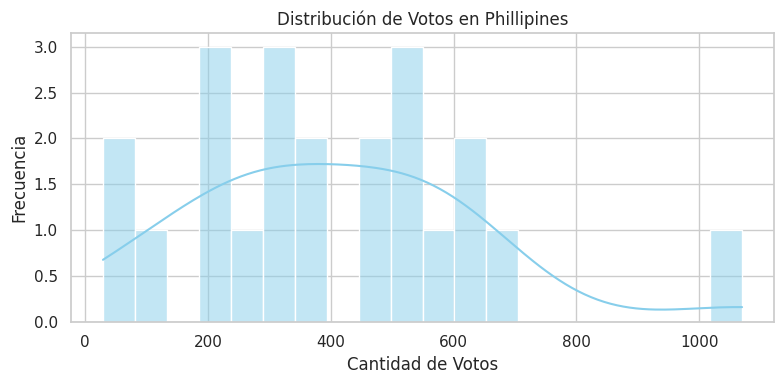

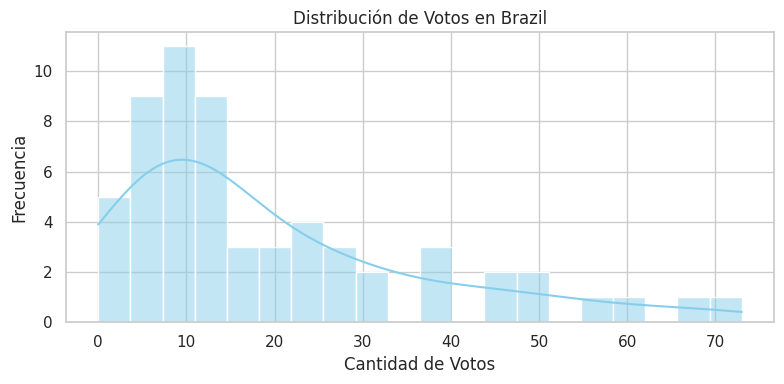

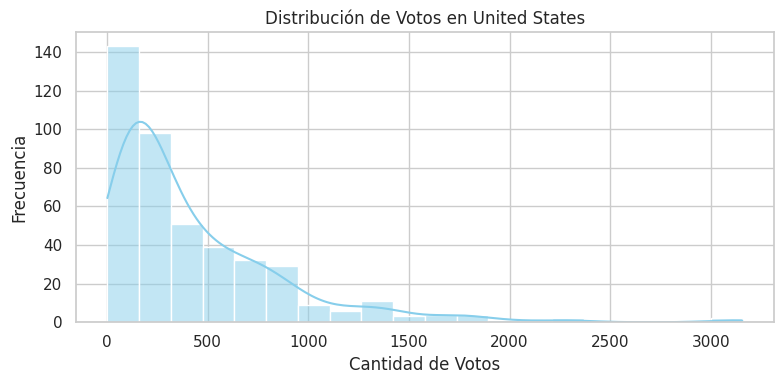

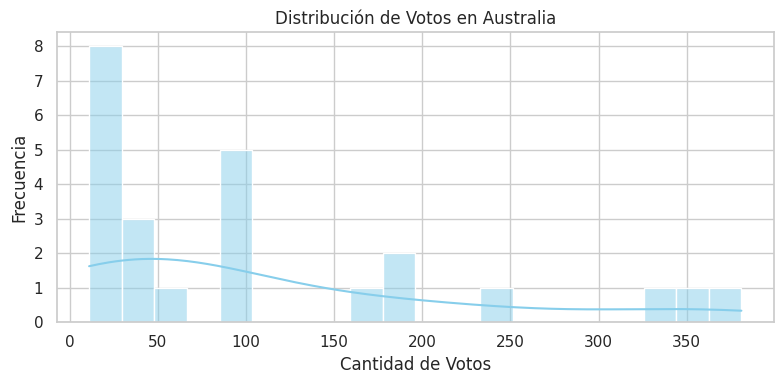

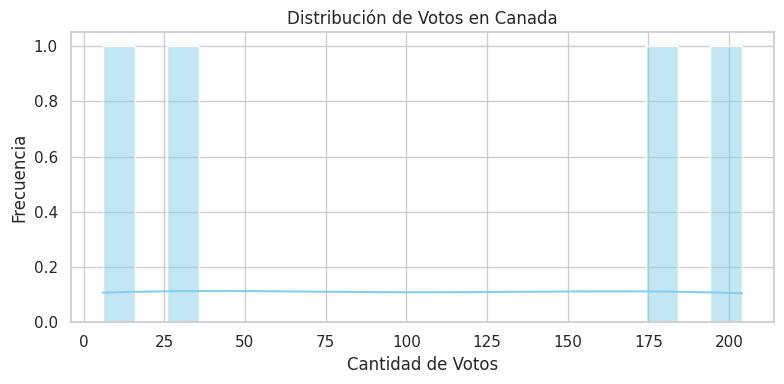

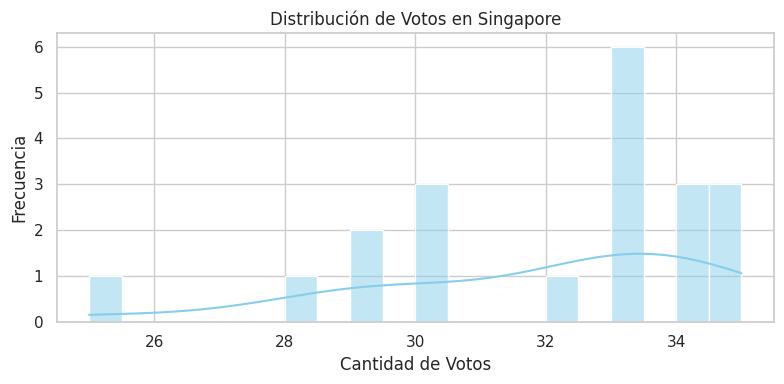

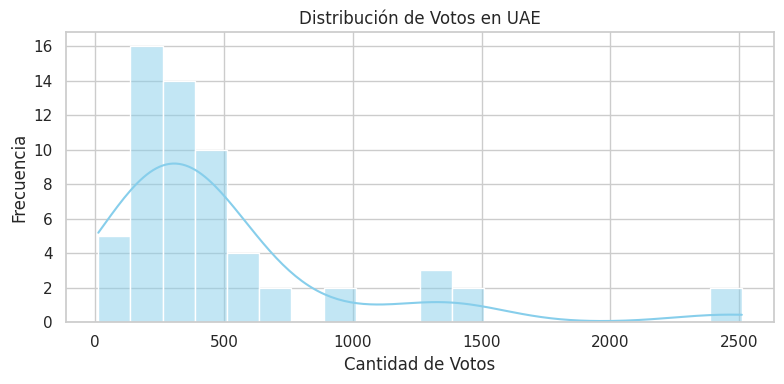

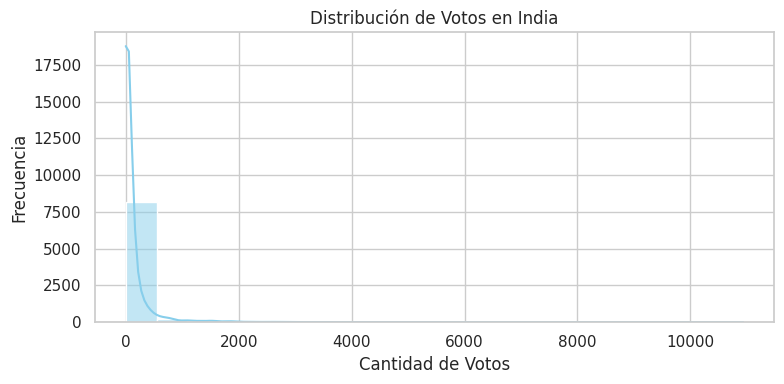

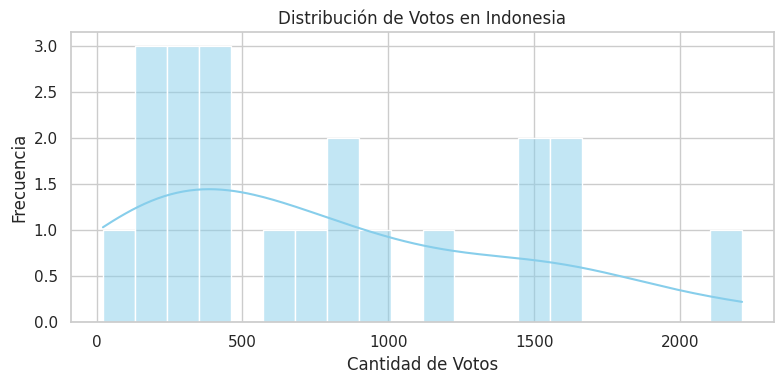

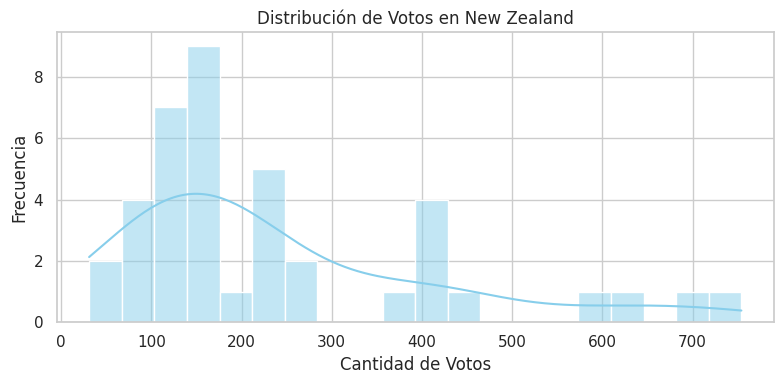

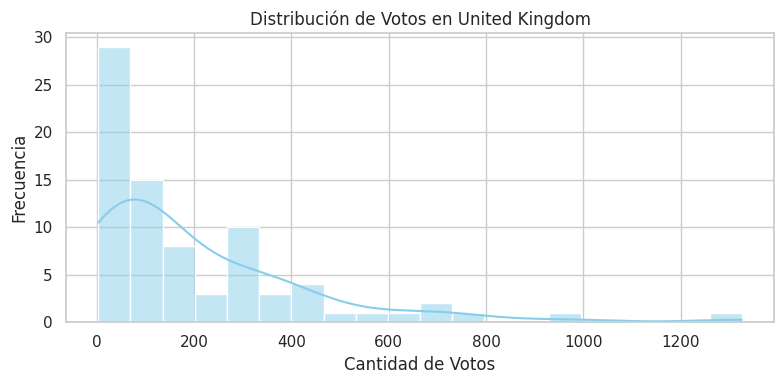

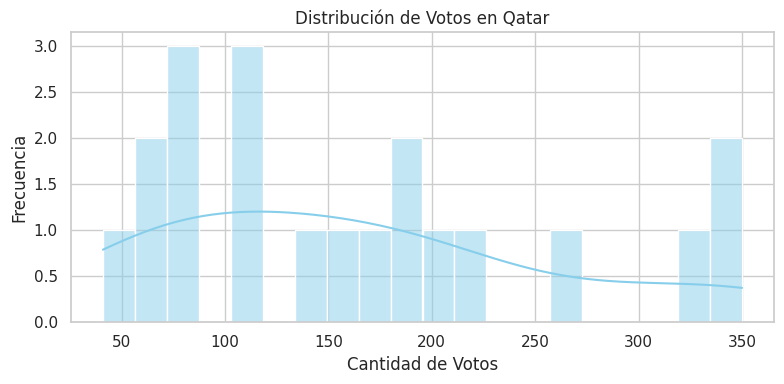

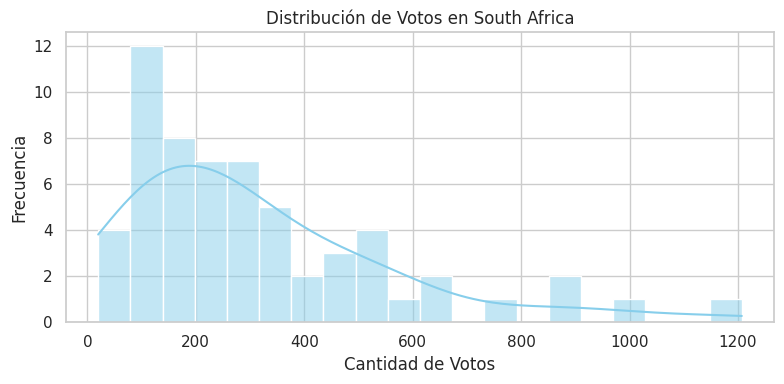

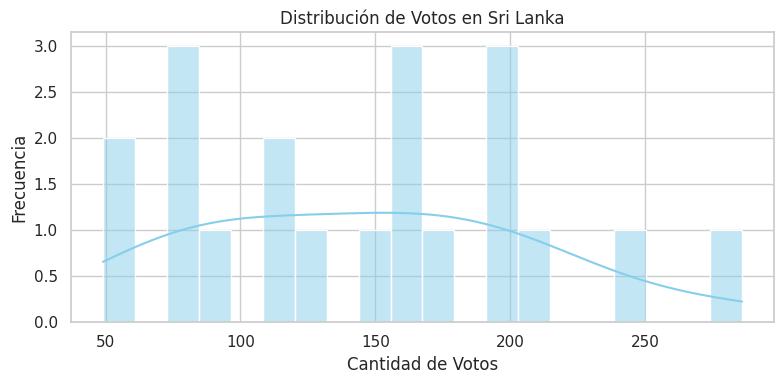

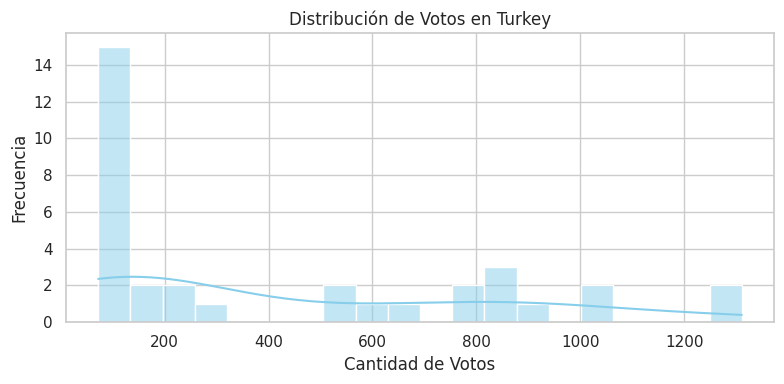

In [ ]:
#Distribucion de votes por cada pais

# Lista de países únicos
paises = data_preparada['Country'].unique()

# Crear un gráfico por país
for pais in paises:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=data_preparada[data_preparada['Country'] == pais],
        x='Votes',
        kde=True,
        bins=20,
        color='skyblue'
    )
    plt.title(f'Distribución de Votos en {pais}')
    plt.xlabel('Cantidad de Votos')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#Distribucion del rango de precios


<ipython-input-2357-e13cc6a2227b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




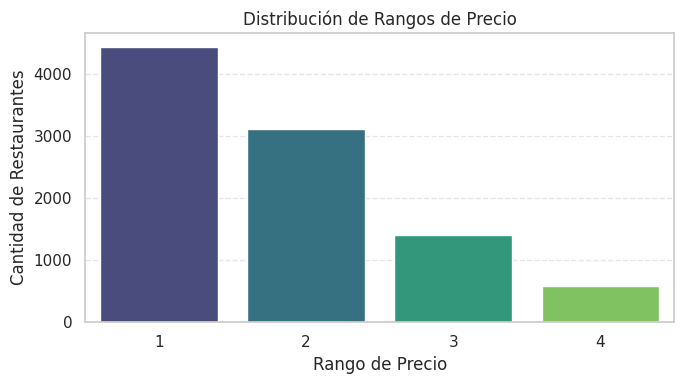

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data_preparada, x='Price range', palette='viridis')

plt.title('Distribución de Rangos de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad de Restaurantes')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

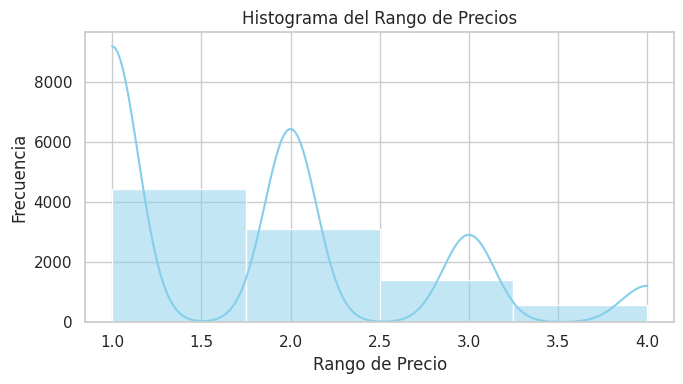

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data_preparada['Price range'], bins=4, kde=True, color='skyblue')

plt.title("Histograma del Rango de Precios")
plt.xlabel("Rango de Precio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

### **6. Transformacion:** Reduccion de Dimensionalidad


In [ ]:
numericas.columns

Index(['Price range', 'Aggregate rating', 'log_Average_Cost', 'Votes'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Aplicación del Análisis de Componentes Principales (PCA) con 2 componentes

In [ ]:
scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(numericas)

In [ ]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_x_scaled)

In [ ]:
data_pca = pd.DataFrame(data_pca)
data_pca.head()

0         1         2
0  2.306723 -0.344904  0.471061
1  2.512109  0.147494  0.054613
2  3.763173 -1.397520 -0.377065
3  3.244154 -0.734273  0.108137
4  3.101015 -1.019438  0.158180

In [ ]:
#Imprima las 4 caracteristicas mas importantes de cada componente


In [ ]:
#Suponiendo que 'pca' es el modelo PCA ajustado
# Accedemos a las cargas de los componentes principales
componentes = pca.components_

# Obtener los nombres de las características
# Asegúrate de que 'features' solo contenga las características usadas en PCA
features = numericas.columns  # Asumiendo que 'numericas' son las columnas usadas en PCA

# Crear un DataFrame con las cargas de los componentes
componentes_df = pd.DataFrame(componentes, columns=features)

# Imprimir las 4 características más importantes de cada componente
for i in range(len(componentes)):
    print(f"Componente {i + 1}:")
    top_features = componentes_df.iloc[i].abs().sort_values(ascending=False).head(4)  # Las 4 características más importantes
    print(top_features)
    print()

Componente 1:
log_Average_Cost    0.580351
Price range         0.573242
Aggregate rating    0.454378
Votes               0.357949
Name: 0, dtype: float64

Componente 2:
Votes               0.869232
Price range         0.337426
log_Average_Cost    0.325577
Aggregate rating    0.156776
Name: 1, dtype: float64

Componente 3:
Aggregate rating    0.876032
Votes               0.341007
Price range         0.268049
log_Average_Cost    0.210786
Name: 2, dtype: float64



### **7. Observaciones**

**Respuesta:** (liste las principales observaciones o conclusiones observadas luego del análisis)

- La correlación entre "Price range" y "log_Average_Cost" destaca la coherencia entre las variables que miden el aspecto económico de los restaurantes, mientras que las correlaciones moderadas con "Aggregate rating" sugieren que los precios pueden influir en las percepciones de calidad, pero no son el único factor determinante. Por otro lado, el número de votos aparece como una variable más independiente, posiblemente influenciada por factores externos no capturados en esta matriz. En conjunto, estas correlaciones ayudan a identificar qué variables están más conectadas y cuáles pueden aportar valor independiente en un modelo de análisis o predicción.

1. Conclusiones de PCA:
- Componente 1: Este componente puede interpretarse como una dimensión de precio general, ya que está fuertemente influenciado por el costo promedio y el rango de precios del establecimiento.
- Componente 2: Este componente puede interpretarse como una medida de popularidad o volumen de participación, dado que los votos tienen la mayor influencia.
- Componente 3: Este componente refleja una dimensión de calidad o satisfacción del cliente, ya que la calificación agregada es el factor predominante.

